In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

In [3]:
from aux_func_States import *

from functions_for_plotting import *

__clist=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


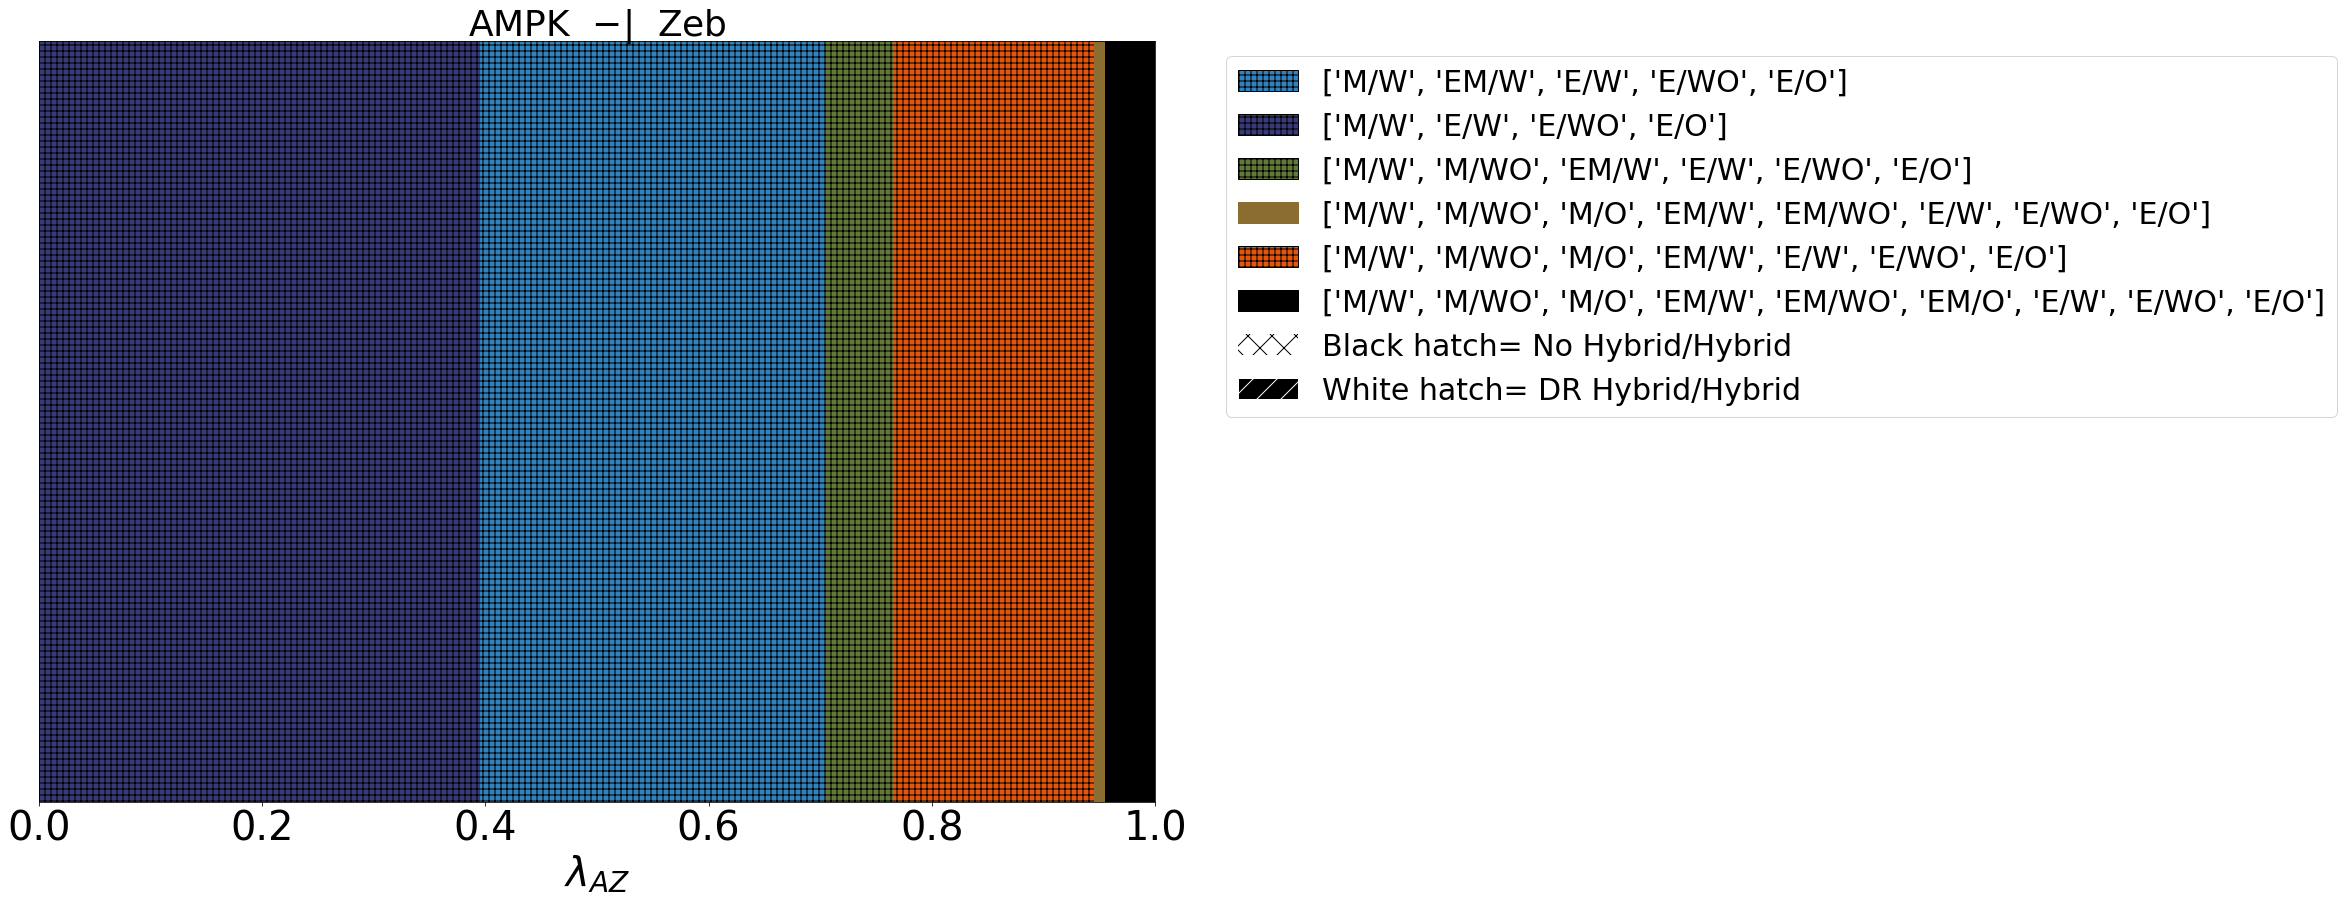

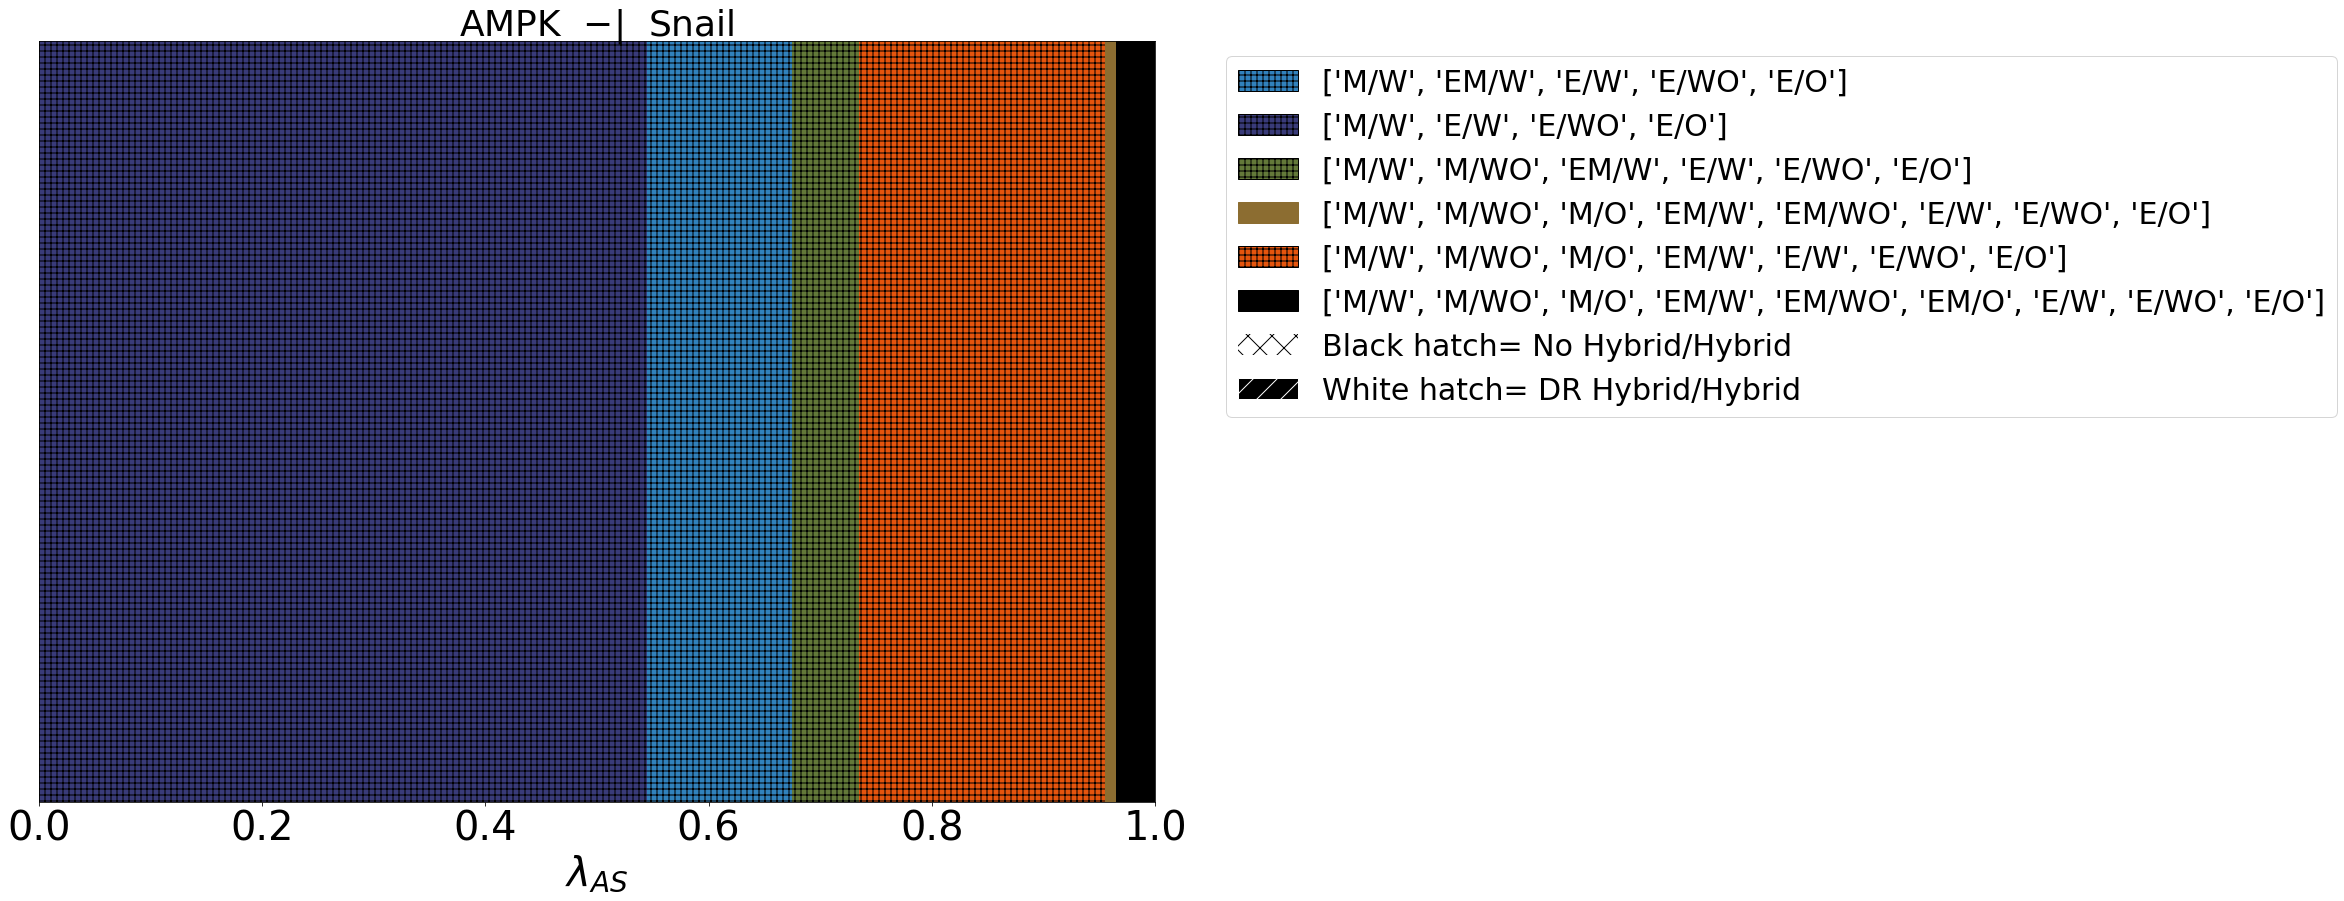

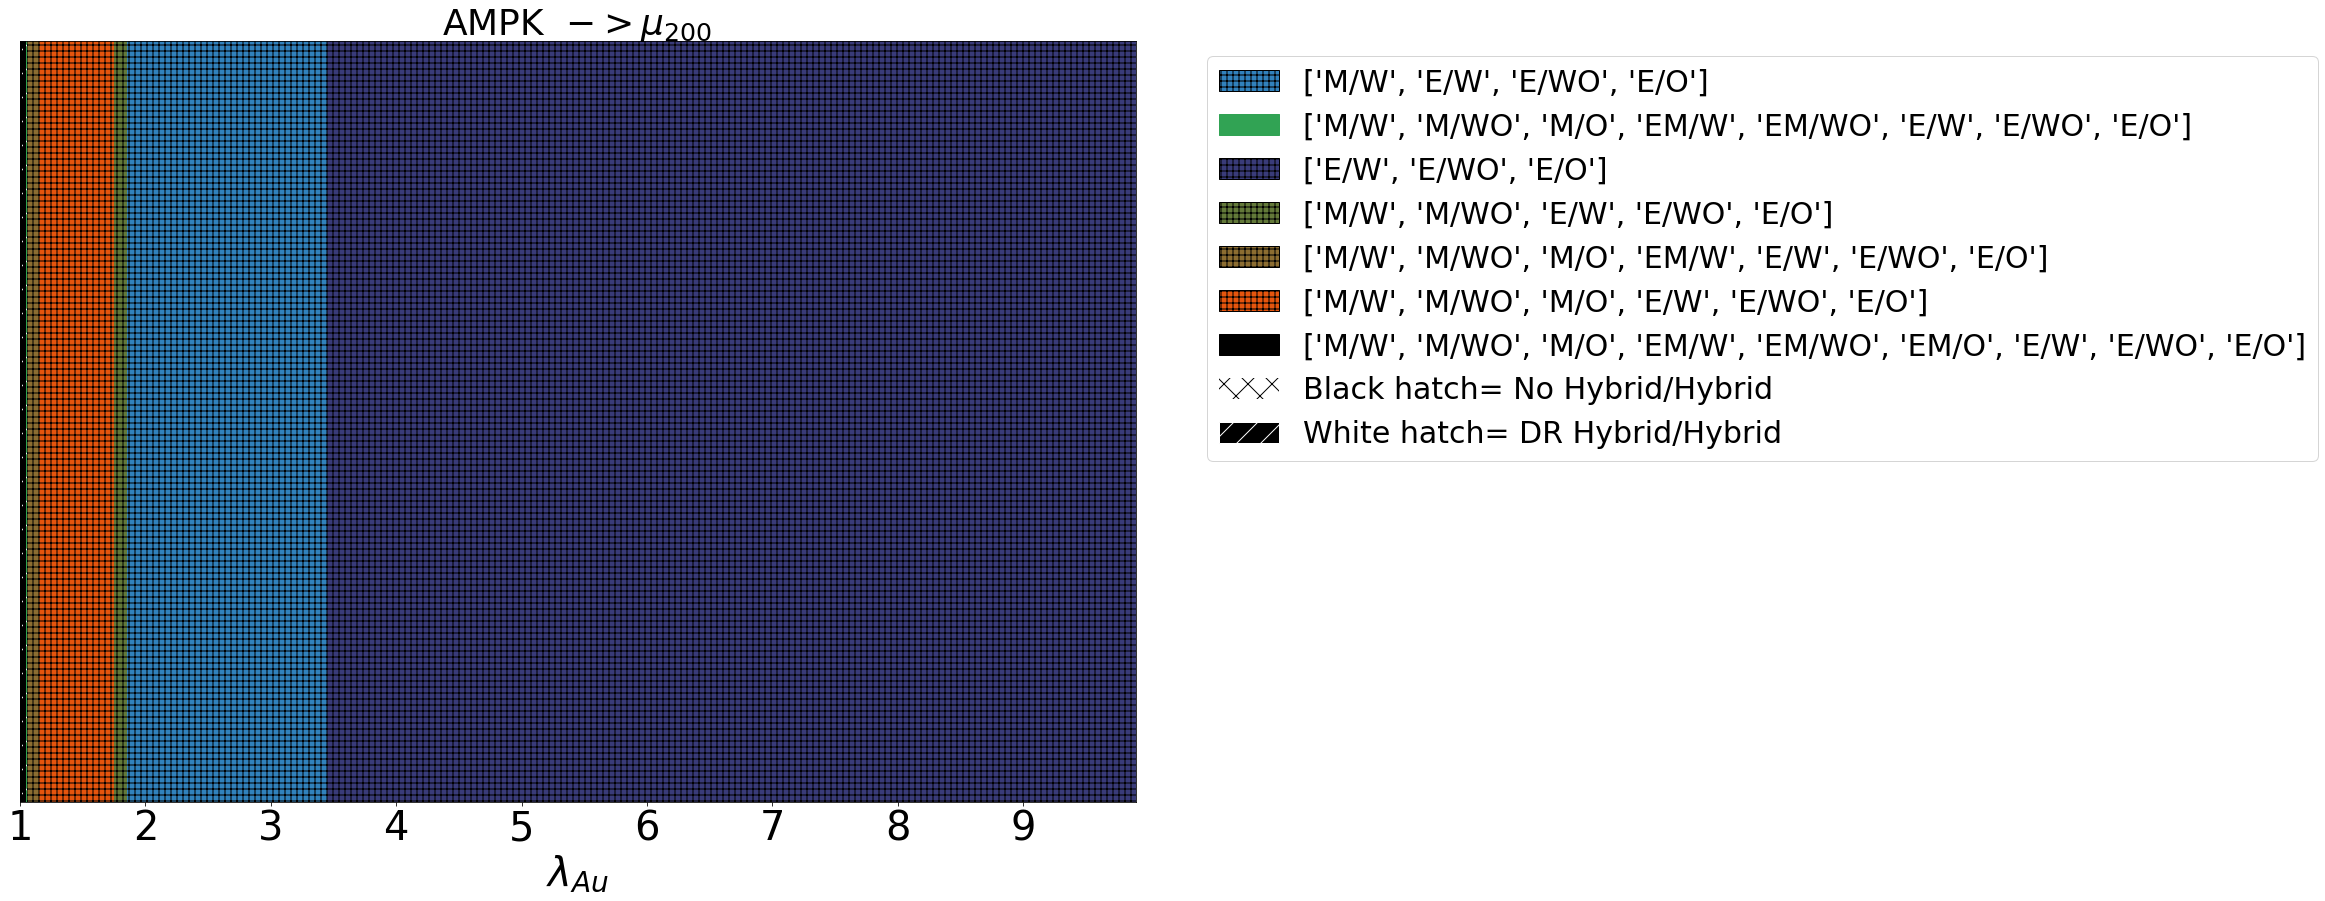

In [4]:
dirN='data/crosstalk_AZ.txt'
xlabel='AZ'#'$\lambda_{AZ}$'
title='AMPK  $-|$  Zeb'
fsave='figures/crosstalk_AZ'
plotCoupledPhenotypes_singleLink(dirN,xlabel,title,fsave)

dirN='data/crosstalk_AS.txt'
xlabel='AS'#'$\lambda_{AS}$'
title='AMPK  $-|$  Snail'
fsave='figures/crosstalk_AS'
plotCoupledPhenotypes_singleLink(dirN,xlabel,title,fsave)

dirN='data/crosstalk_Au.txt'
xlabel='Au'#'$\lambda_{Au}$'
title='AMPK  $-> \mu_{200}$ '
fsave='figures/crosstalk_Au'
plotCoupledPhenotypes_singleLink(dirN,xlabel,title,fsave)

In [5]:
def getIndBound(df,key,key2=-1):
    lab=getStateListfromFile(df,False)

    xval = df[key].values
    if key2==-1:
        yval = df[key].values*0.
    else:
        yval = df[key2].values

    inds = np.argsort(xval)
    xval = np.array(xval)[inds]
    yval = np.array(yval)[inds]
    lab= np.array(lab)[inds]

    label=np.array(lab)
    x1,x2,y1,y2,label=getDataForPlot(xval,yval,label)
    color,star_colors,colList = getPlotData(label)
    bx,by,bc= getPhaseBoundaries(xval,yval,color)
    colors_list= np.array(getColorMatch(colList))

    return bx,by,bc,colors_list

In [6]:
def matchLC(color,color_list):
    ind = np.argwhere(color==color_list[:,1])[:,0][0]
    return color_list[ind][0]

In [7]:
def getLoc(bc1,colors_list1):
    loc1=[]
    for i in range(len(bc1)):
        tmp = matchLC(bc1[i],colors_list1)
        for j in range(len(all_types)):
            if equals(all_types[j],tmp):
                loc1+=[j]
                break
    return loc1

## Understand single 

In [8]:
dirN='../coupledWReg_Ccode/crosstalk_AS/'
fsave='data/crosstalk_AS.txt'
output_results(dirN,fsave)

dirN='../coupledWReg_Ccode/crosstalk_Au/'
fsave='data/crosstalk_Au.txt'
output_results(dirN,fsave)

dirN='../coupledWReg_Ccode/crosstalk_AZ/'
fsave='data/crosstalk_AZ.txt'
output_results(dirN,fsave)


OSError: [Errno 2] No such file or directory: '../coupledWReg_Ccode/crosstalk_AS/'

In [ ]:
df_AS = pd.read_csv("data/crosstalk_AS.txt")
df_Au = pd.read_csv("data/crosstalk_Au.txt")
df_AZ = pd.read_csv("data/crosstalk_AZ.txt")

In [ ]:
key_list =['E', 'EM', 'M', 'W', 'WO', 'O', 'M/W', 'M/WO', 'M/O','EM/W', 'EM/WO', 'EM/O', 'E/W', 'E/WO', 'E/O']

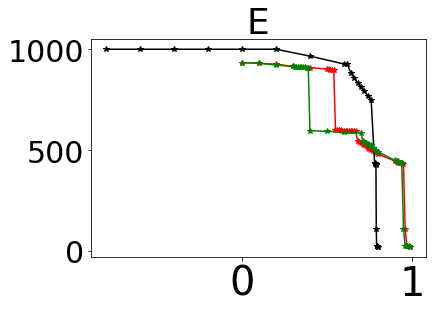

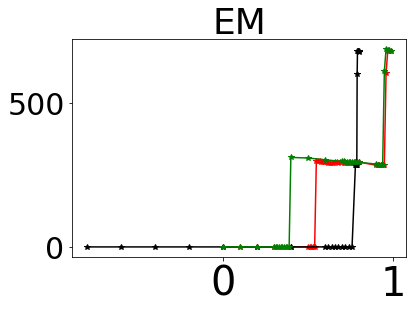

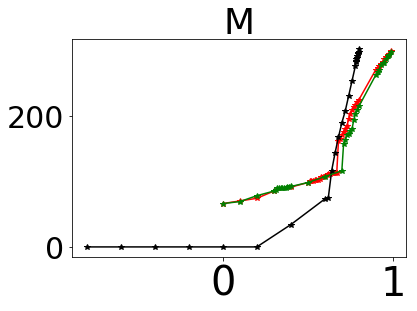

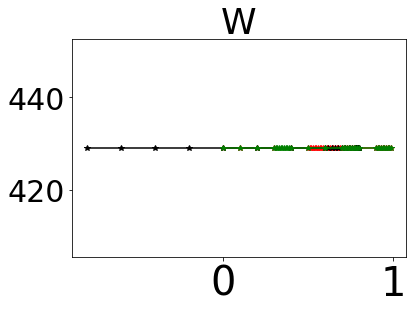

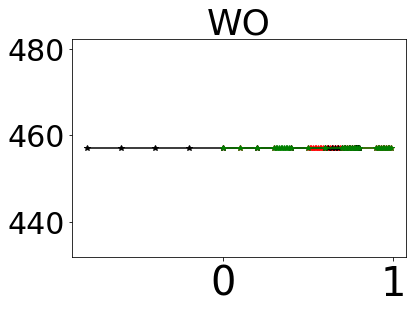

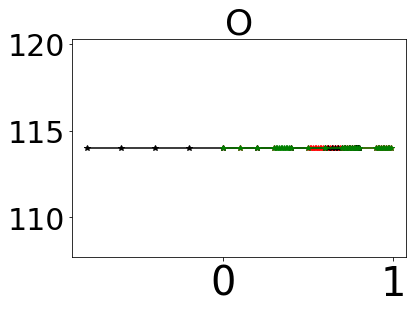

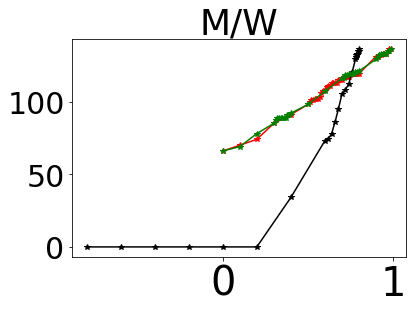

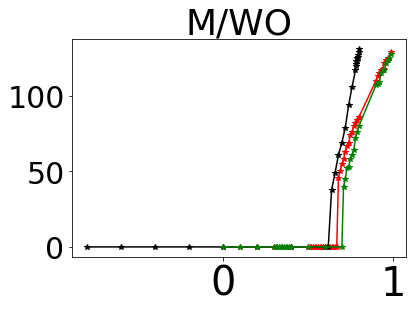

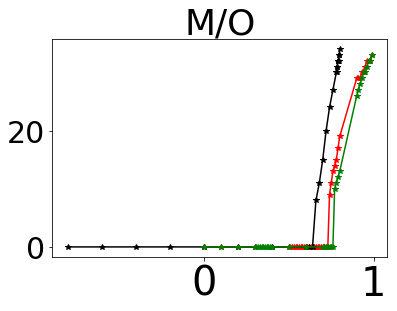

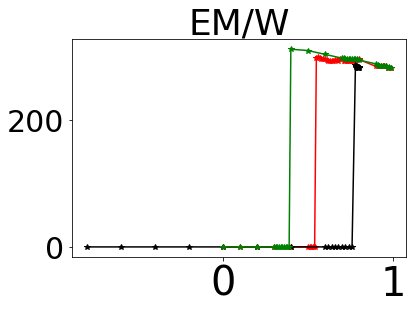

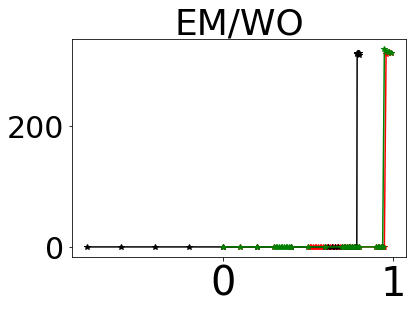

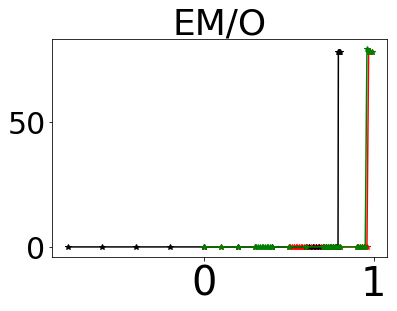

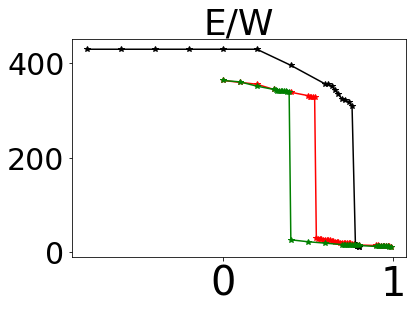

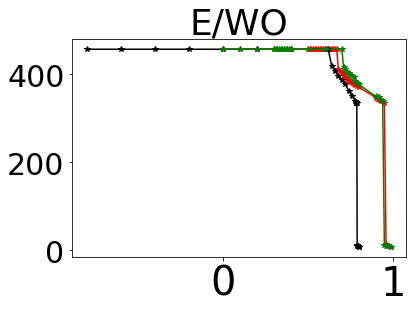

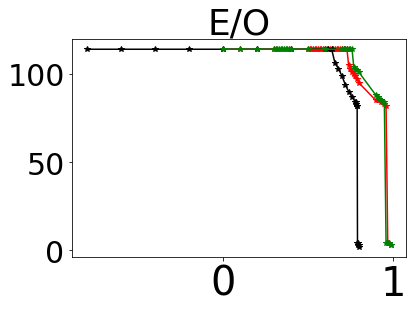

In [10]:
scale_Au =0.2
for key in key_list:
    inds = np.argsort(df_AS['AS'].values)
    x = df_AS['AS'].values[inds]
    y = df_AS[key].values[inds]
    plt.plot(x,y,'r*-',label='AS')
    inds2 = np.argsort(df_Au['AU'].values)
    x2 = df_Au['AU'].values[inds2]
    y2 = df_Au[key].values[inds2]
    plt.plot(1-x2*scale_Au,y2,'k*-',label='Au')
    inds3 = np.argsort(df_AZ['AZ'].values)
    x3 = df_AZ['AZ'].values[inds3]
    y3 = df_AZ[key].values[inds3]
    plt.plot(x3,y3,'g*-',label='AZ')

    plt.title(key)
    plt.show()

In [11]:
bx1,by1,bc1,colors_list1 = getIndBound(df_AS,'AS')
bx2,by2,bc2,colors_list2 = getIndBound(df_Au,'AU')
bx3,by3,bc3,colors_list3 = getIndBound(df_AZ,'AZ')

all_types=[]
for i in range(len(colors_list1)):
    all_types+=[colors_list1[i][0]]
for i in range(len(colors_list2)):
    all_types+=[colors_list2[i][0]]
for i in range(len(colors_list3)):
    all_types+=[colors_list3[i][0]]
    
all_types=np.unique(all_types)
legend = getLegend(all_types)

loc1 = getLoc(bc1,colors_list1)
loc2 = getLoc(bc2,colors_list2)
loc3 = getLoc(bc3,colors_list3)

In [12]:
### goal is to get a plot with 3 y axis for type vs foldchange


In [13]:
print bx1,loc1
print bx2,loc2
print bx3,loc3

[[0.545, 0.675], [0.735, 0.955], [0.0, 0.545], [0.955, 0.965], [0.675, 0.735], [0.965, 0.99]] [2, 6, 1, 7, 4, 8]
[[1.85, 3.5], [1.15, 1.75], [1.045, 1.0550000000000002], [3.5, 9.0], [1.0550000000000002, 1.15], [1.75, 1.85], [1.0, 1.045]] [1, 5, 7, 0, 6, 3, 8]
[[0.395, 0.705], [0.765, 0.945], [0.0, 0.395], [0.945, 0.955], [0.705, 0.765], [0.955, 0.99]] [2, 6, 1, 7, 4, 8]


(0, 1)

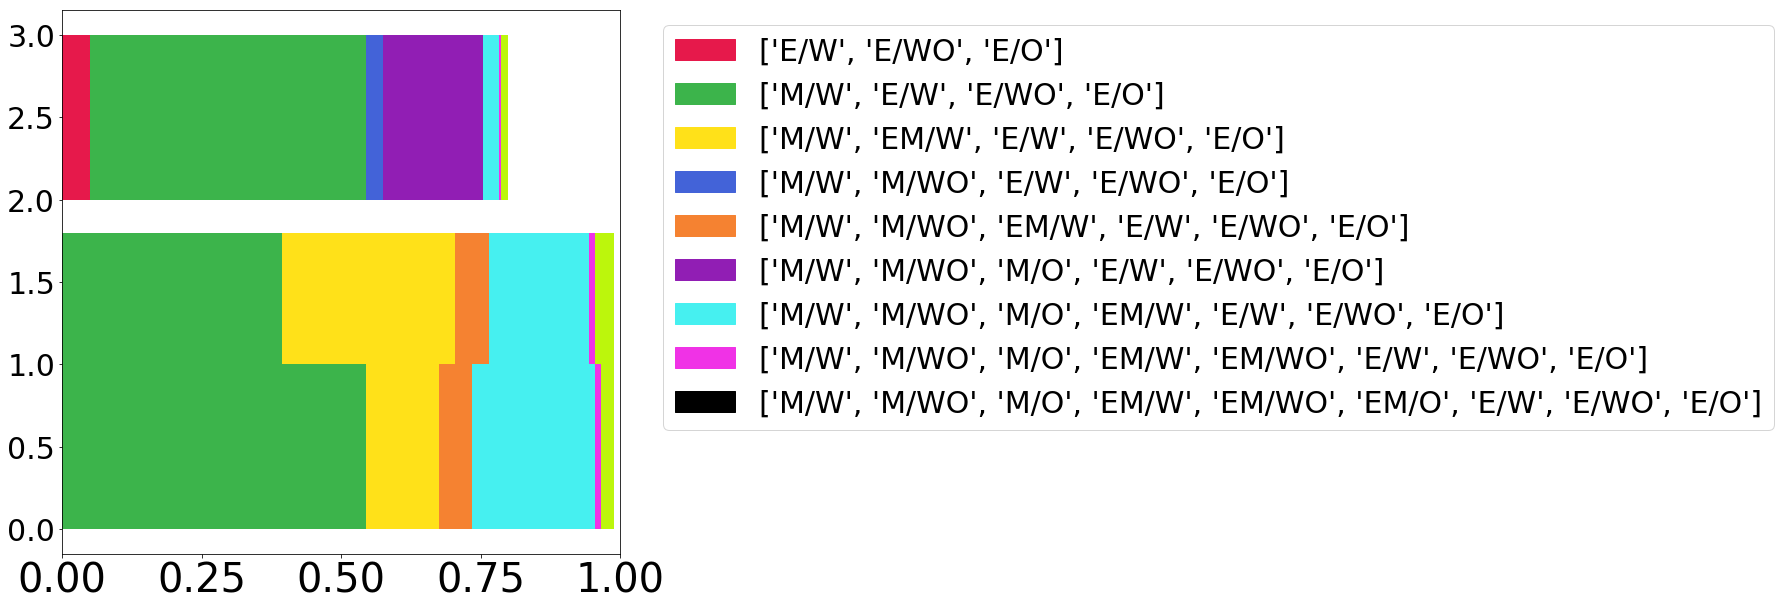

In [14]:
figure = plt.figure(figsize=(10,10))
lw = 40
for i in range(len(bx1)):
    plt.fill_between(bx1[i],0,1,facecolor=__clist[loc1[i]])
for i in range(len(bx3)):
    plt.fill_between(bx3[i],1,1.8,facecolor=__clist[loc3[i]])
    

for i in range(len(bx2)):
    plt.fill_between(1.1-np.array(bx2[i])*0.3,2,3,facecolor=__clist[loc2[i]])
        
plt.legend(handles=legend,  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,1)

(0.775, 1)

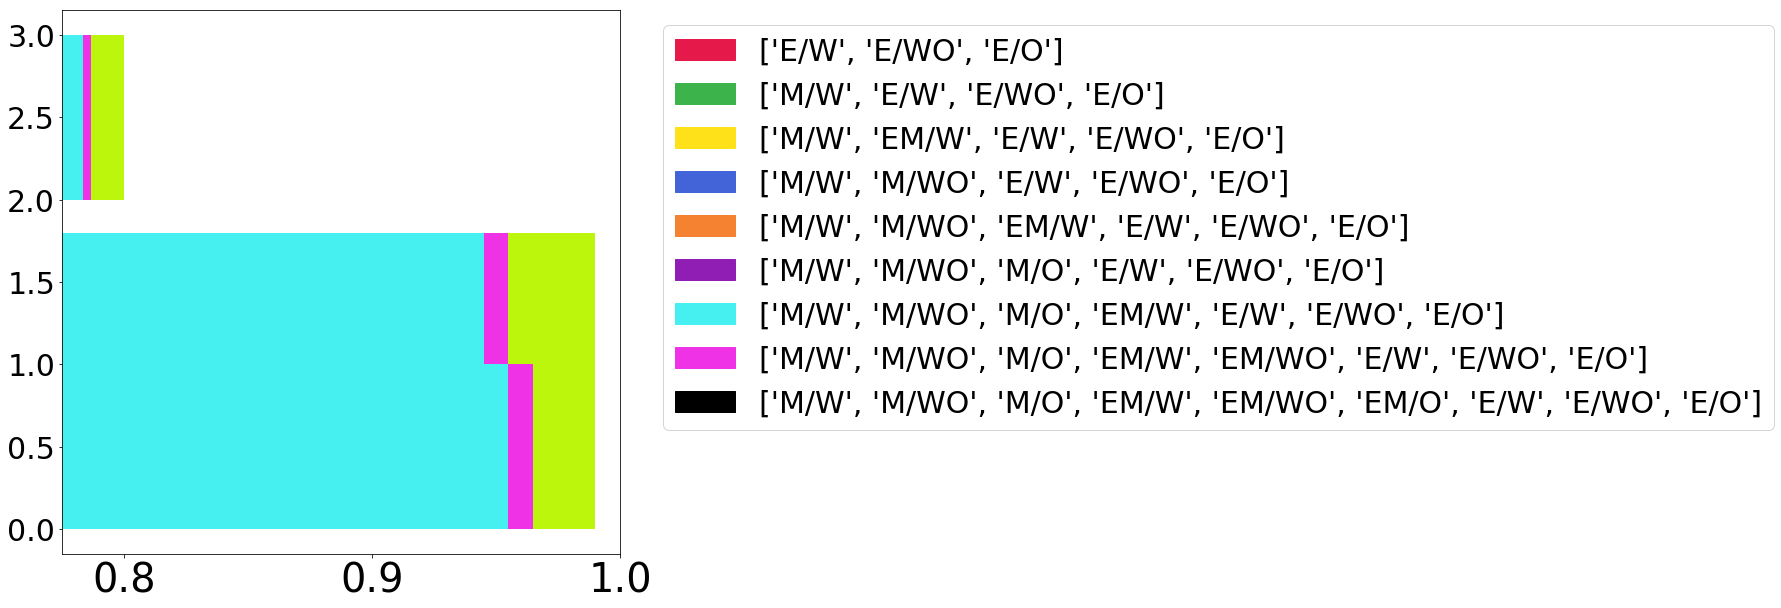

In [15]:
## high equivalents
figure = plt.figure(figsize=(10,10))
lw = 40
for i in range(len(bx1)):
    plt.fill_between(bx1[i],0,1,facecolor=__clist[loc1[i]])
for i in range(len(bx3)):
    plt.fill_between(bx3[i],1,1.8,facecolor=__clist[loc3[i]])
    

for i in range(len(bx2)):
    plt.fill_between(1.1-np.array(bx2[i])*0.3,2,3,facecolor=__clist[loc2[i]])
        
plt.legend(handles=legend,  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0.775,1)

(0, 0.35)

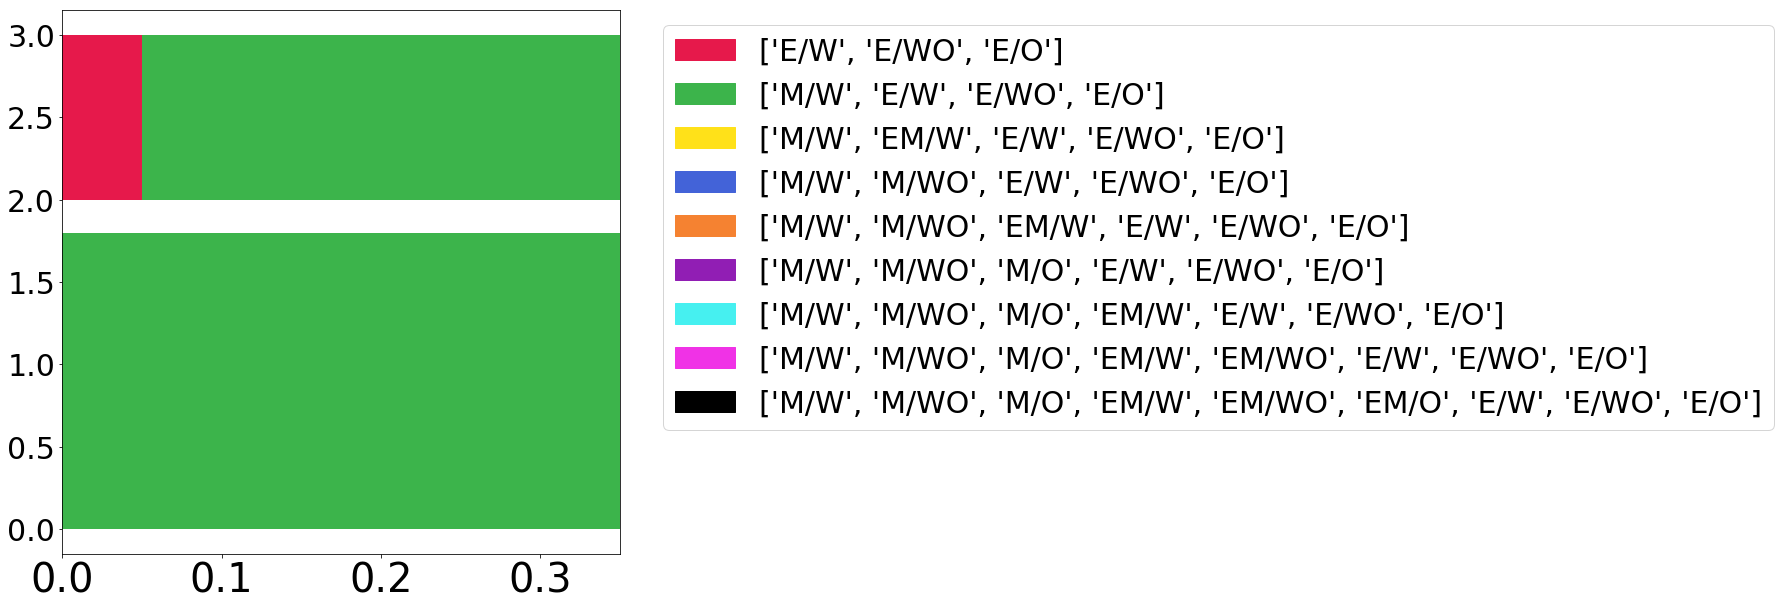

In [16]:
## low equivalents
figure = plt.figure(figsize=(10,10))
lw = 40
for i in range(len(bx1)):
    plt.fill_between(bx1[i],0,1,facecolor=__clist[loc1[i]])
for i in range(len(bx3)):
    plt.fill_between(bx3[i],1,1.8,facecolor=__clist[loc3[i]])
    

for i in range(len(bx2)):
    plt.fill_between(1.1-np.array(bx2[i])*0.3,2,3,facecolor=__clist[loc2[i]])
        
plt.legend(handles=legend,  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,0.35)

(1, 1.15)

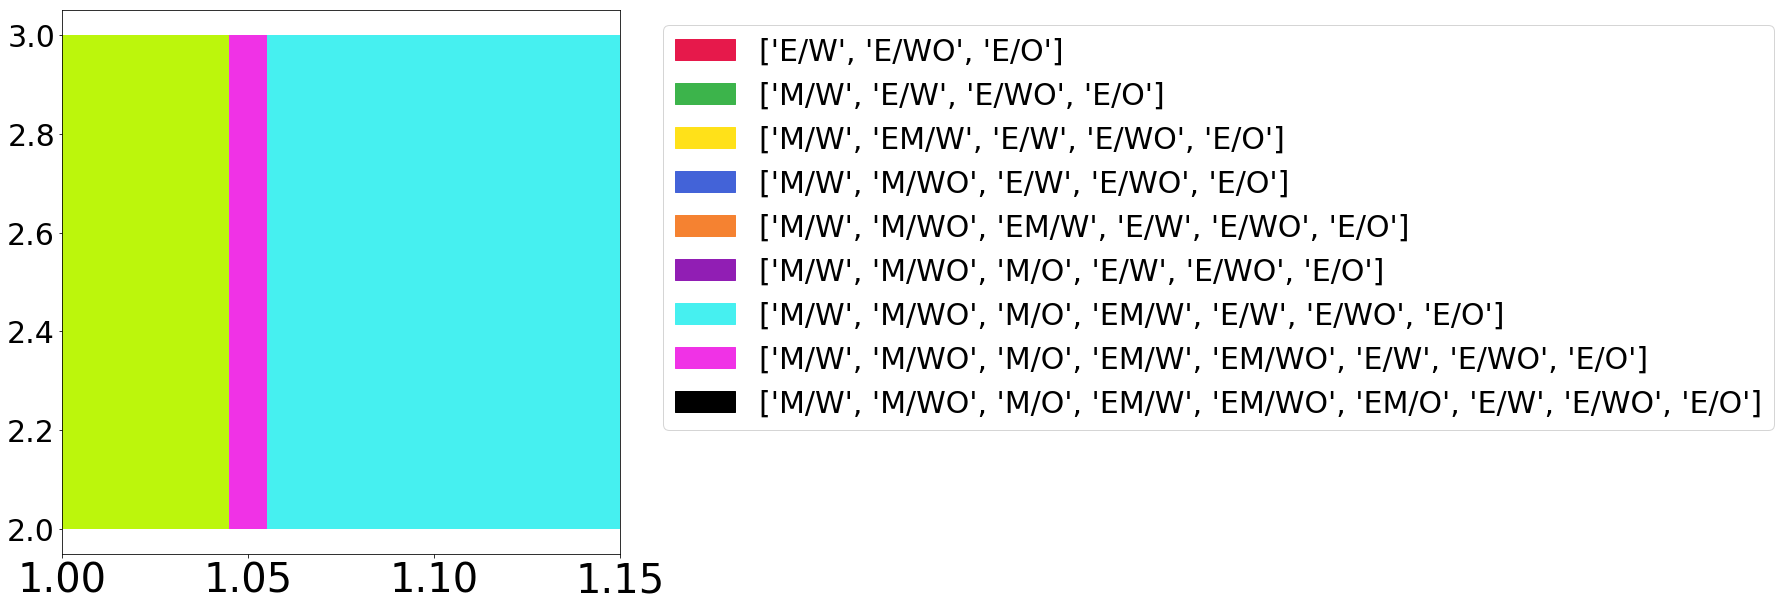

In [17]:
## au values check
figure = plt.figure(figsize=(10,10))

for i in range(len(bx2)):
    plt.fill_between(bx2[i],2,3,facecolor=__clist[loc2[i]])
        
plt.legend(handles=legend,  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(1,1.15)

## Look at double links now (Hu)

In [18]:
dirN='../coupledWReg_Ccode/crosstalk_AS_Hu/'
fsave='data/crosstalk_AS_Hu.txt'
output_results(dirN,fsave)

dirN='../coupledWReg_Ccode/crosstalk_Au_Hu/'
fsave='data/crosstalk_Au_Hu.txt'
output_results(dirN,fsave)

dirN='../coupledWReg_Ccode/crosstalk_AZ_Hu/'
fsave='data/crosstalk_AZ_Hu.txt'
output_results(dirN,fsave)


970 != 1000.0


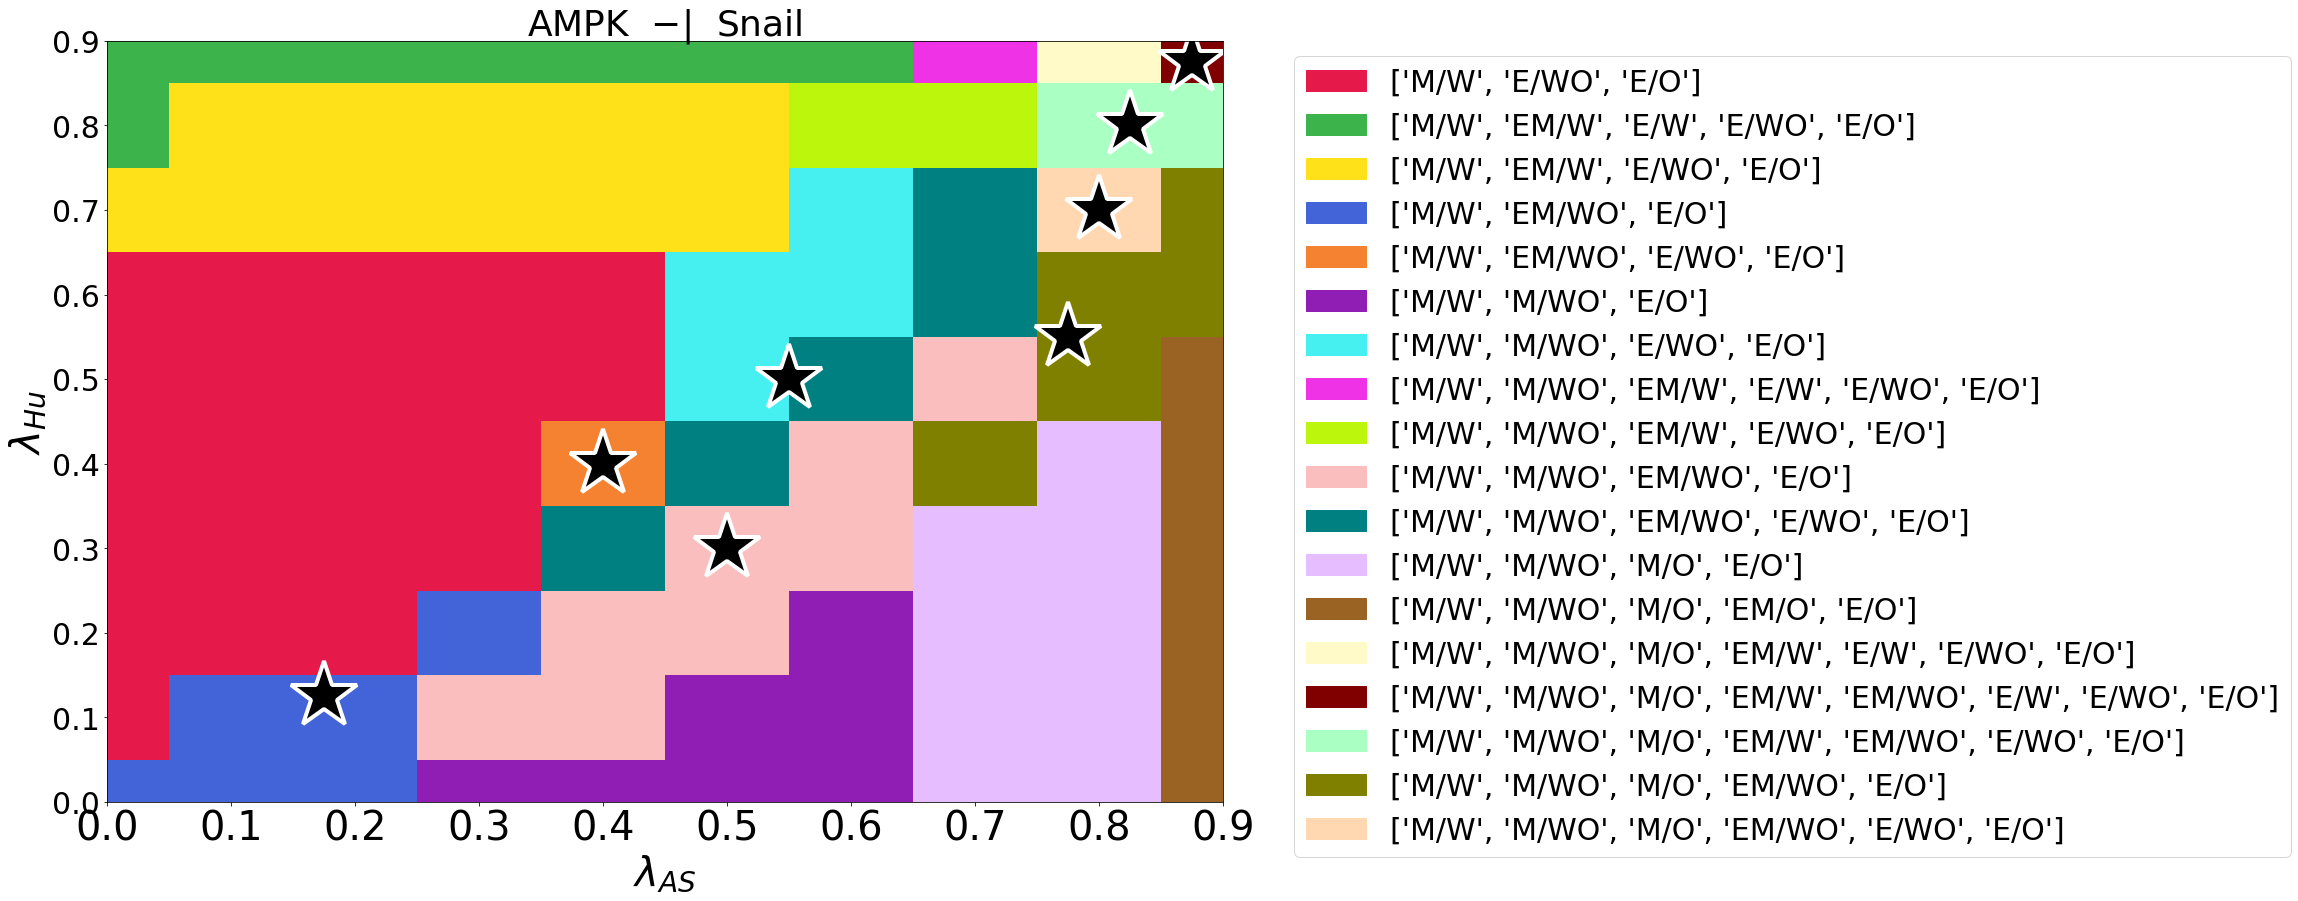

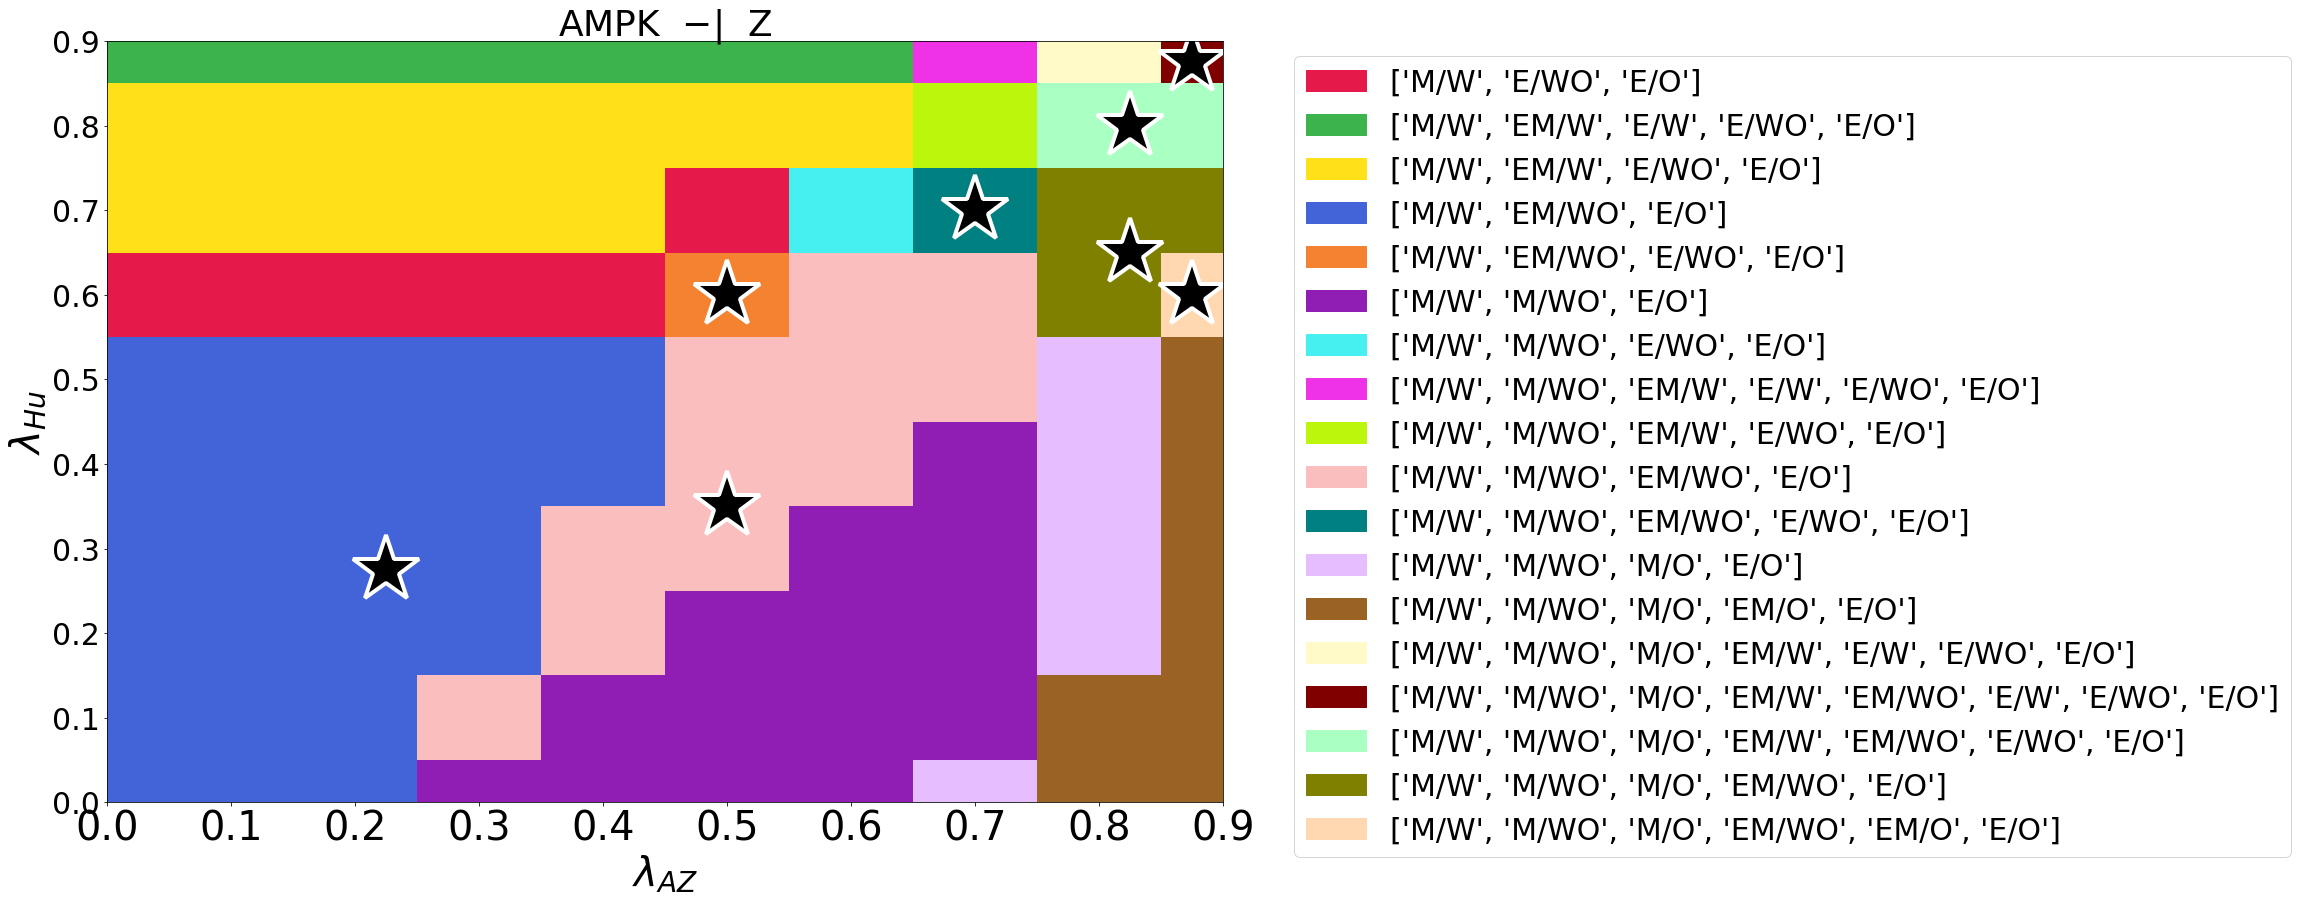

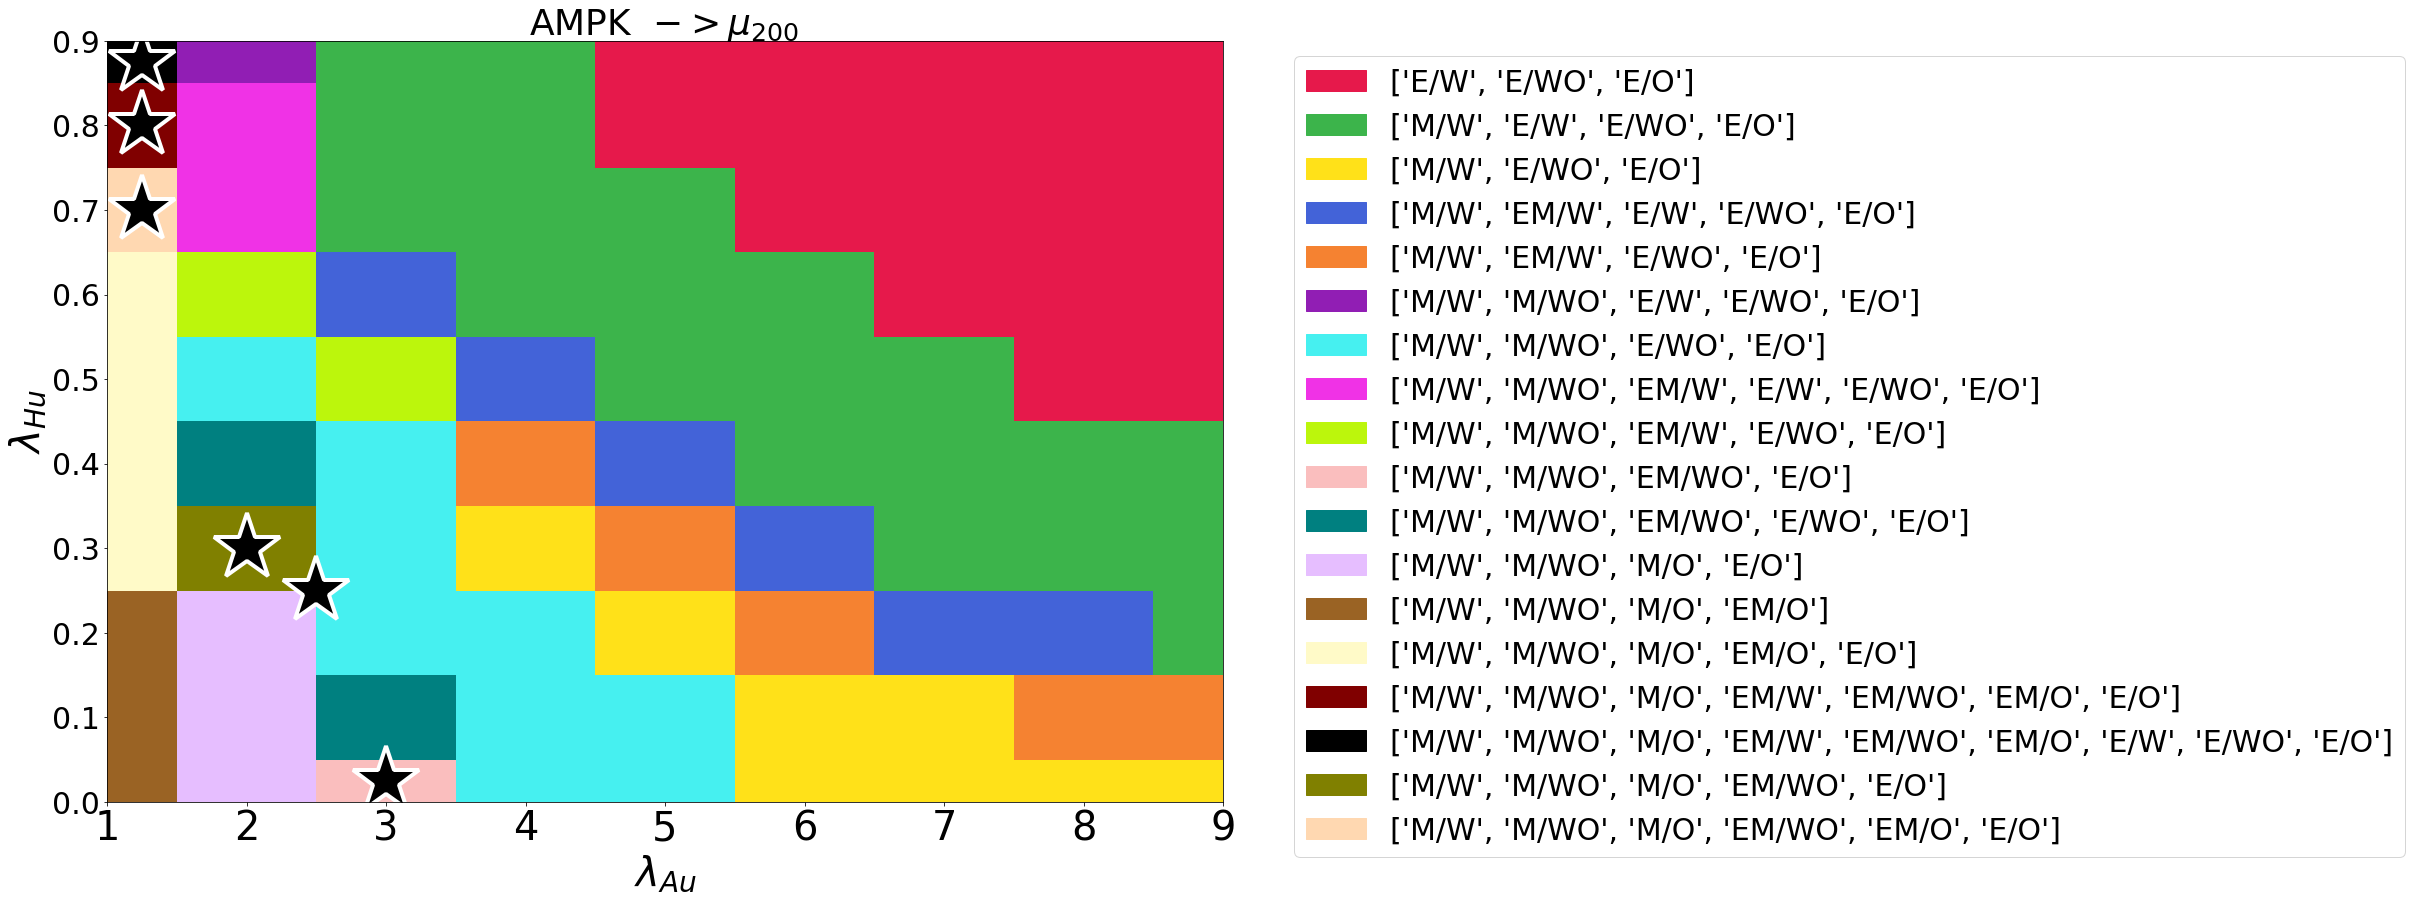

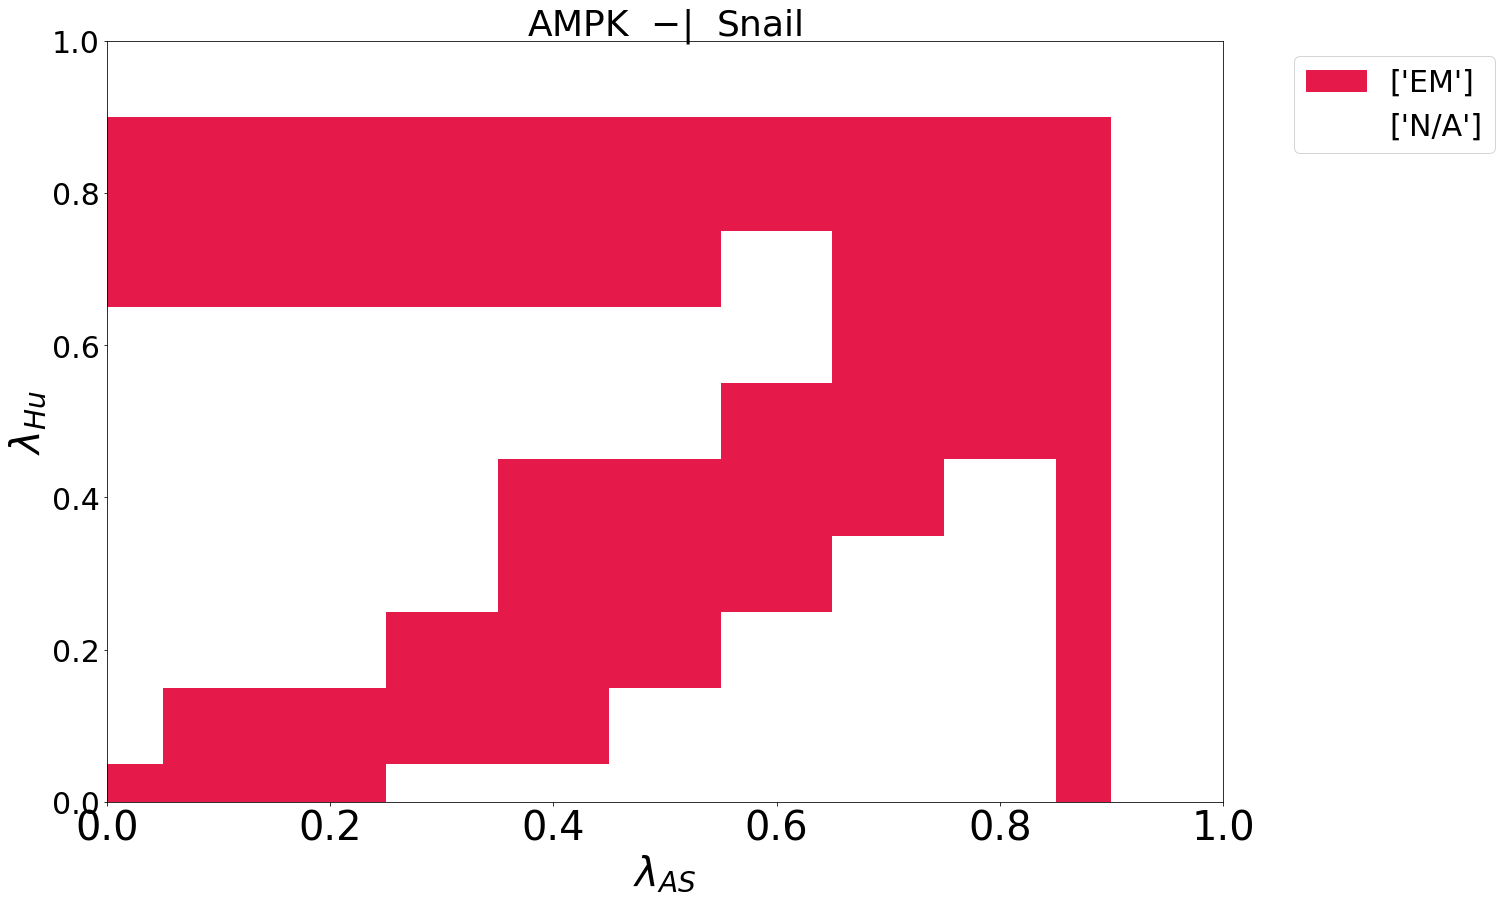

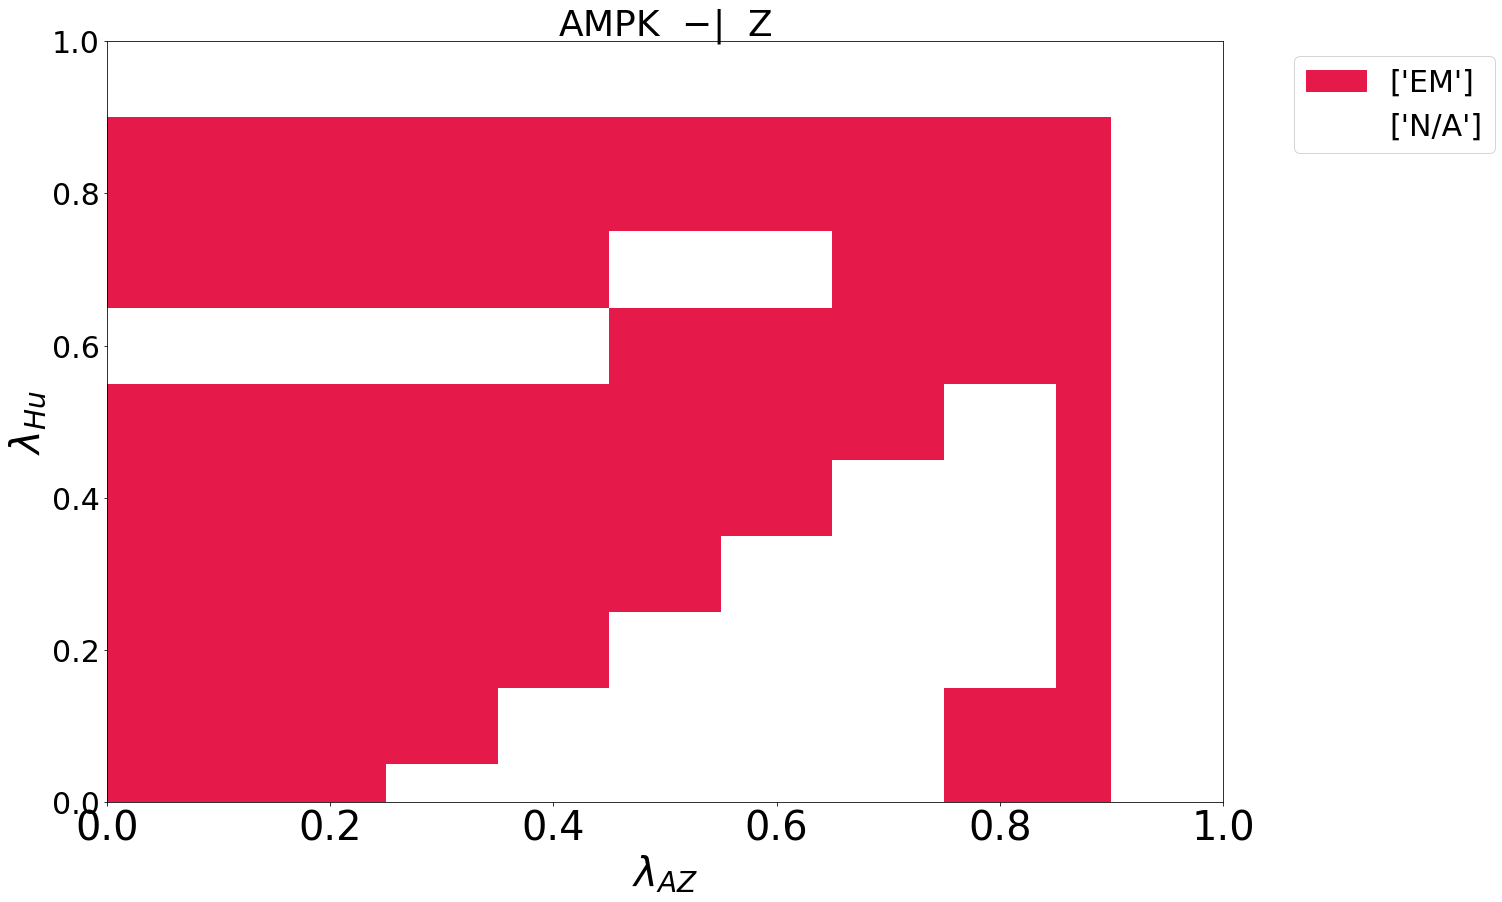

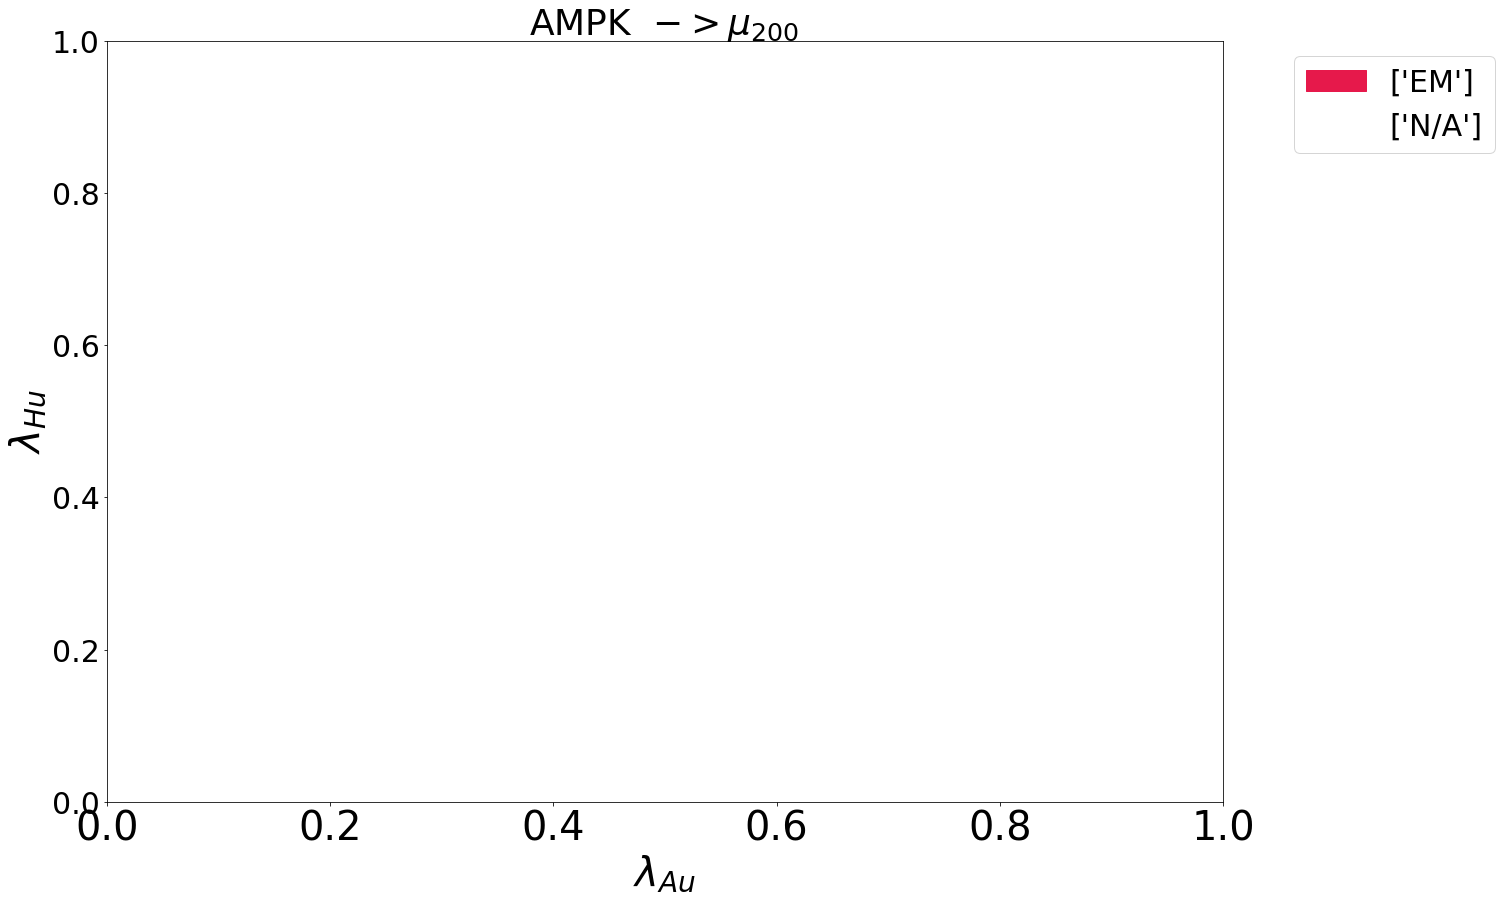

In [19]:
ya = 'Hu'

dirN='data/crosstalk_AS_Hu.txt'
xa = 'AS'
title='AMPK  $-|$  Snail'
fsave='figures/crosstalk_AS_Hu'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave)

dirN='data/crosstalk_AZ_Hu.txt'
xa = 'AZ'
ya = 'Hu'
title='AMPK  $-|$  Z'
fsave='figures/crosstalk_AZ_Hu'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave)

dirN='data/crosstalk_Au_Hu.txt'
xa = 'Au'
title='AMPK  $-> \mu_{200}$ '
fsave='figures/crosstalk_Au_Hu'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave)




dirN='data/crosstalk_AS_Hu.txt'
xa = 'AS'
title='AMPK  $-|$  Snail'
fsave='figures/crosstalk_AS_Hu'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave,onlyShowHybrid='EM',xlim=[0,1],ylim=[0,1])

dirN='data/crosstalk_AZ_Hu.txt'
xa = 'AZ'
title='AMPK  $-|$  Z'
fsave='figures/crosstalk_AZ_Hu'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave,onlyShowHybrid='EM',xlim=[0,1],ylim=[0,1])


dirN='data/crosstalk_Au_Hu.txt'
xa = 'Au'
title='AMPK  $-> \mu_{200}$ '
fsave='figures/crosstalk_Au_Hu'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave,onlyShowHybrid='EM',xlim=[0,1],ylim=[0,1])


In [20]:
df_ASu = pd.read_csv("data/crosstalk_AS_Hu.txt")
df_Auu = pd.read_csv("data/crosstalk_Au_Hu.txt")
df_AZu = pd.read_csv("data/crosstalk_AZ_Hu.txt")

In [21]:
key_list =['E', 'EM', 'M', 'W', 'WO', 'O', 'M/W', 'M/WO', 'M/O','EM/W', 'EM/WO', 'EM/O', 'E/W', 'E/WO', 'E/O']

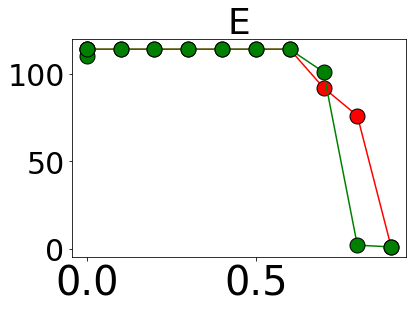

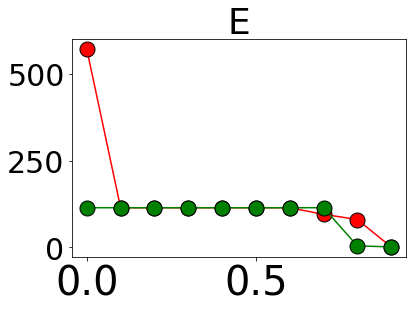

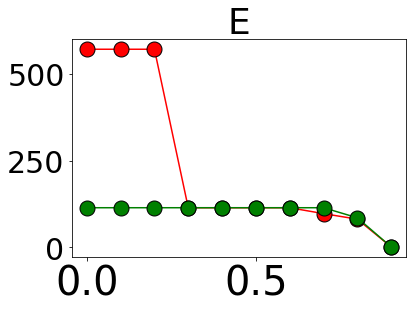

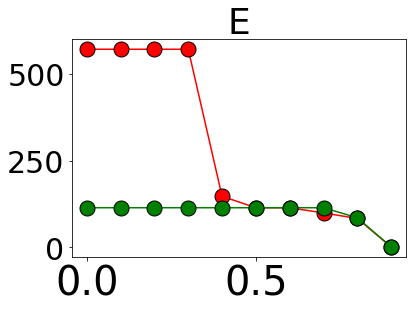

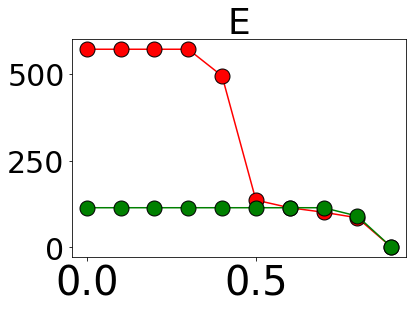

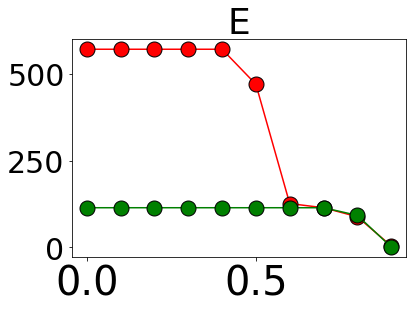

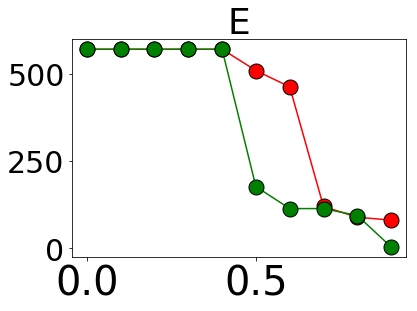

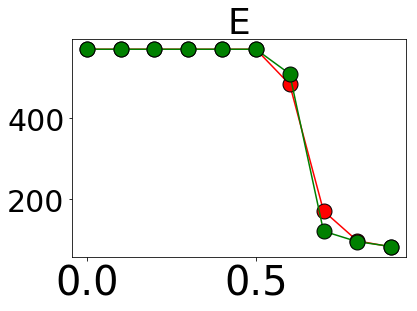

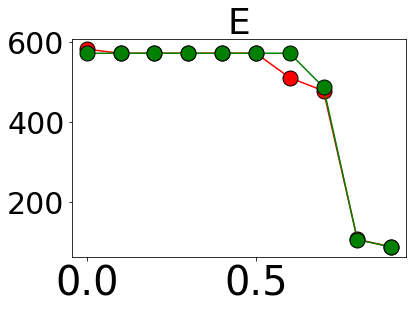

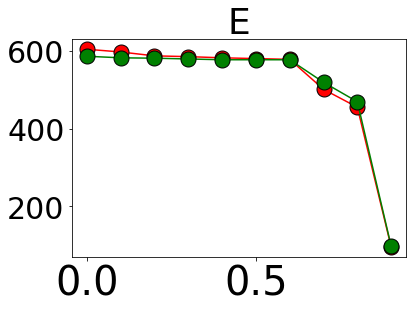

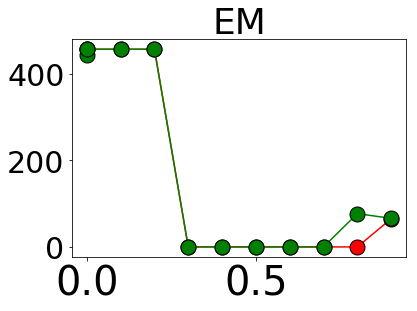

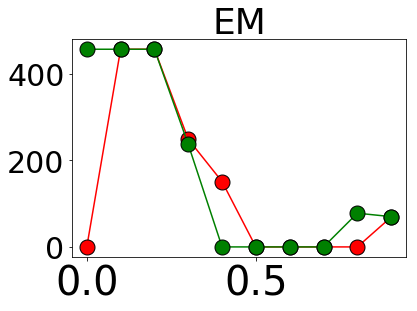

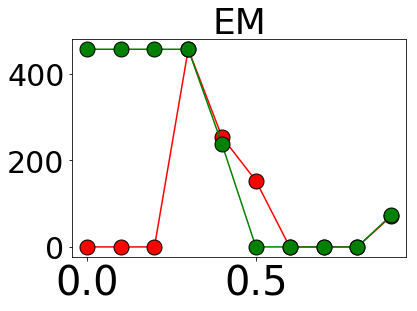

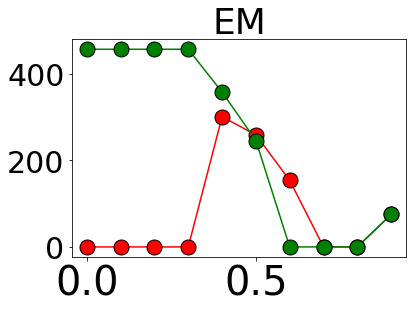

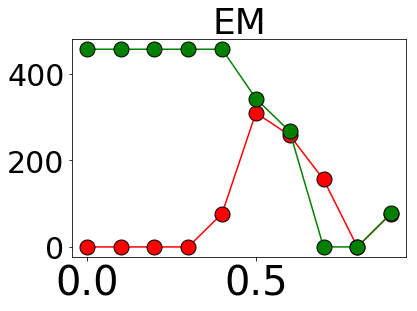

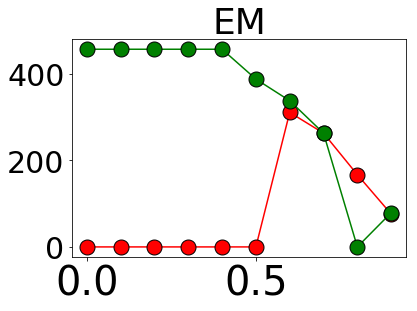

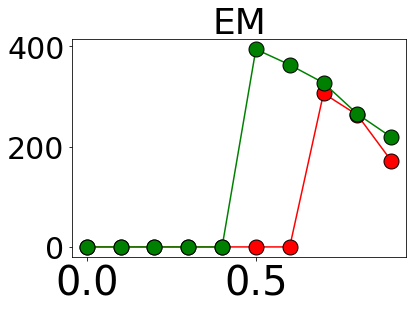

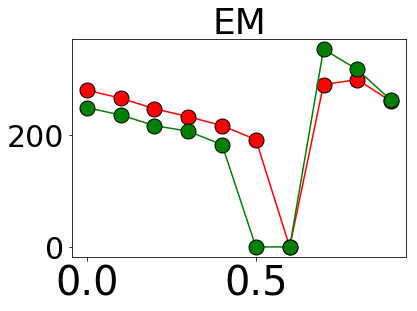

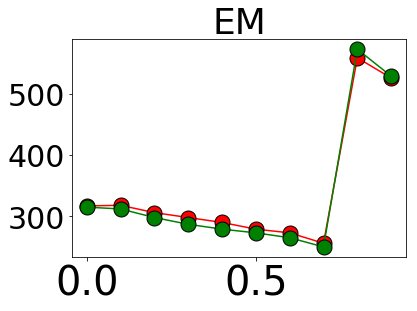

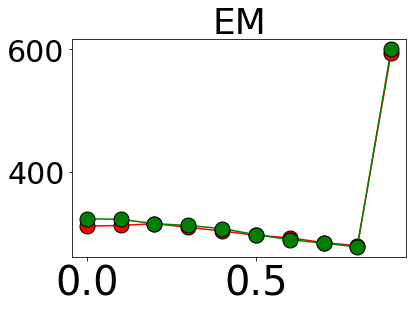

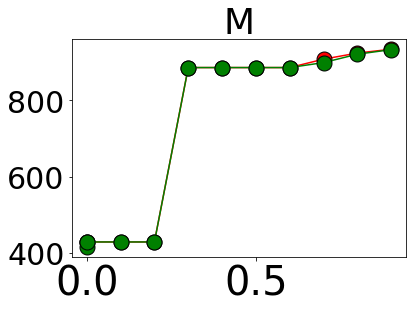

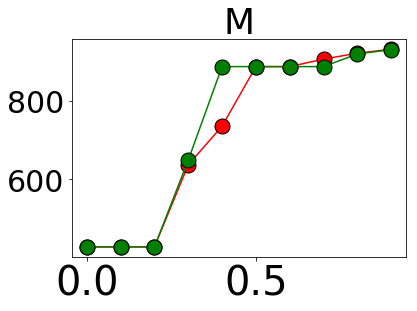

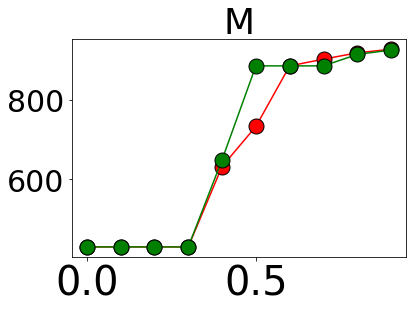

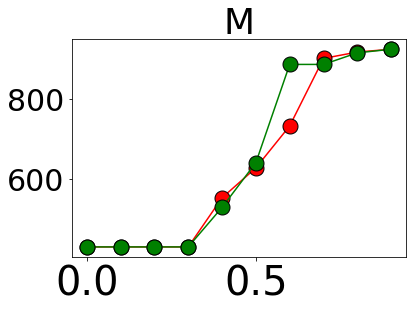

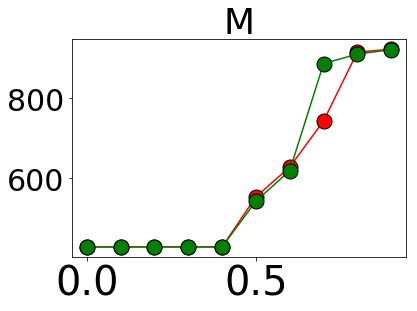

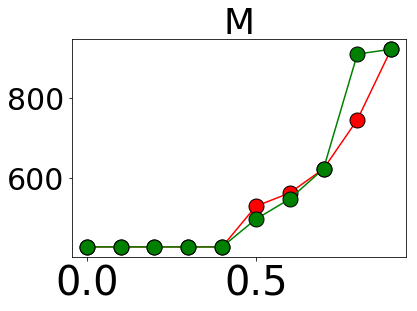

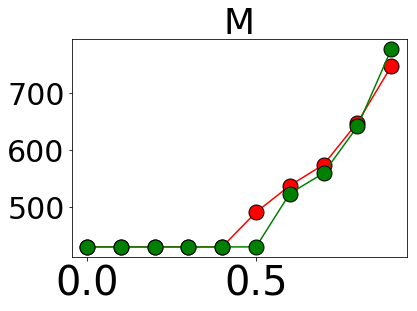

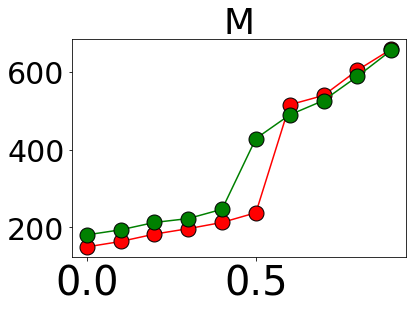

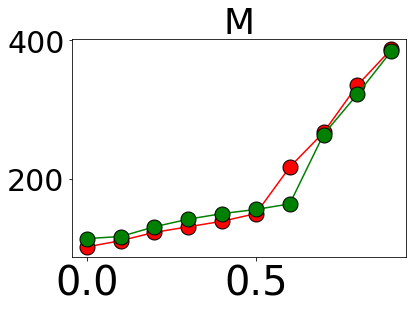

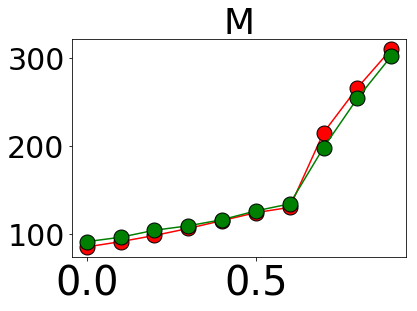

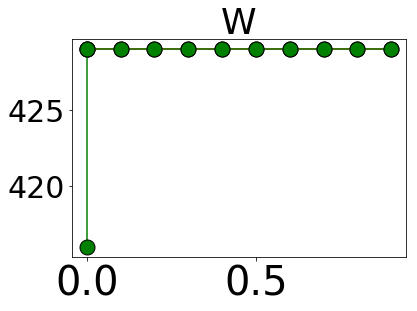

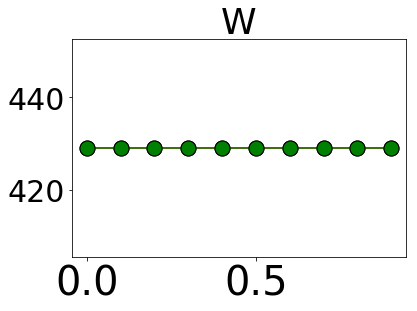

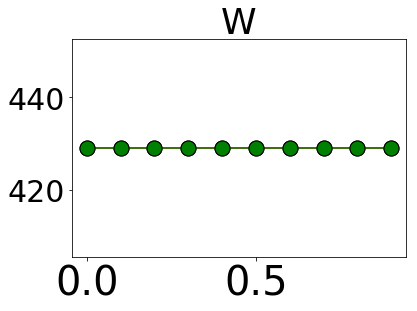

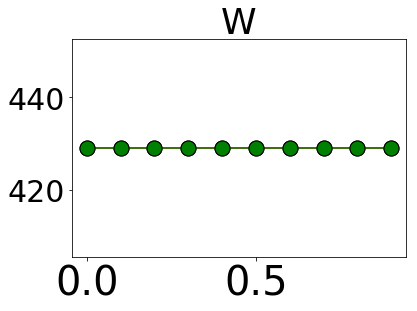

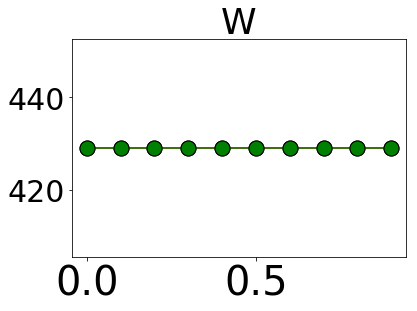

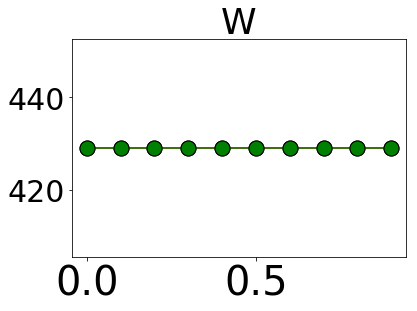

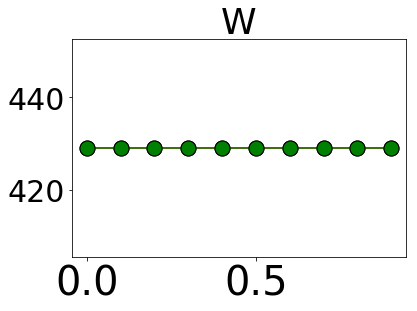

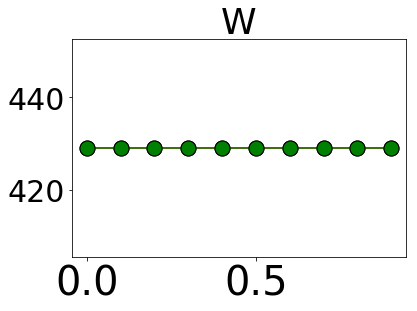

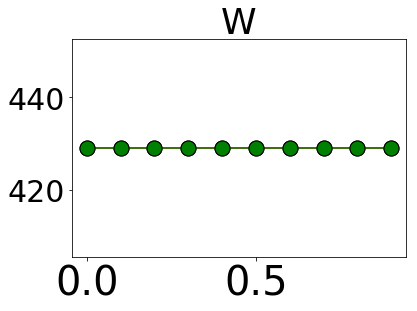

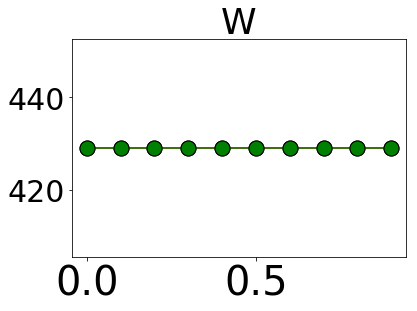

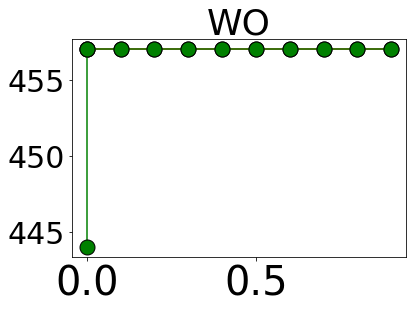

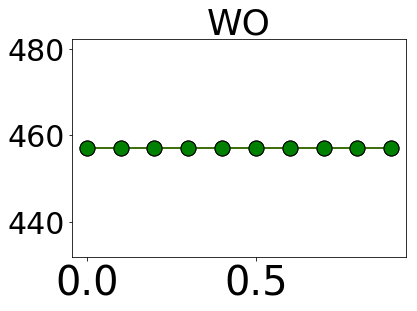

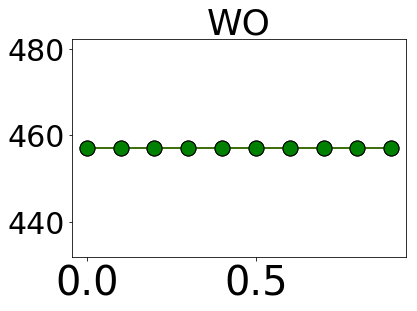

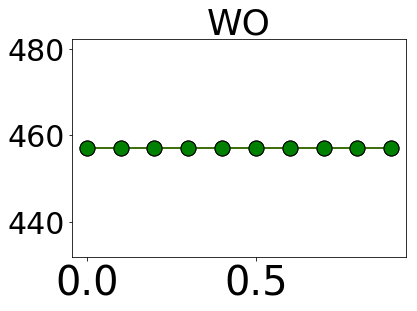

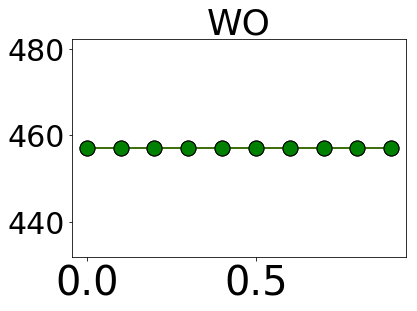

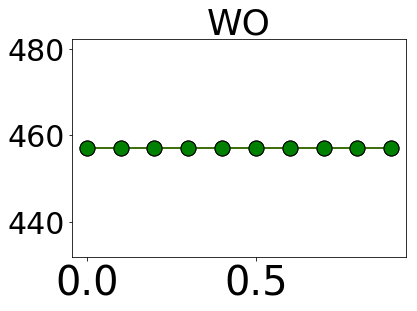

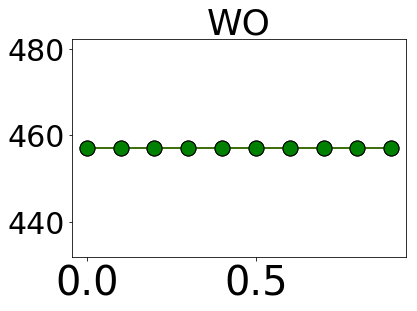

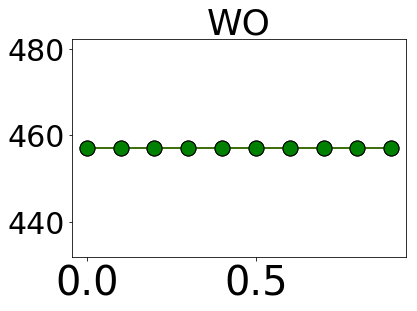

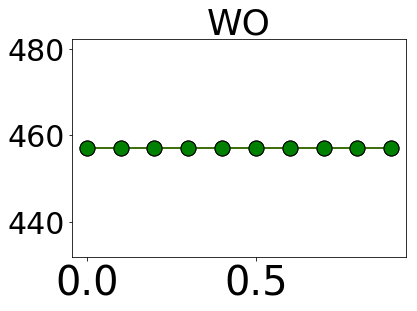

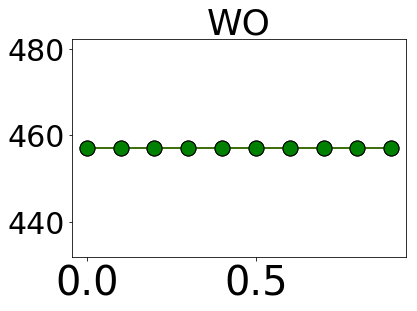

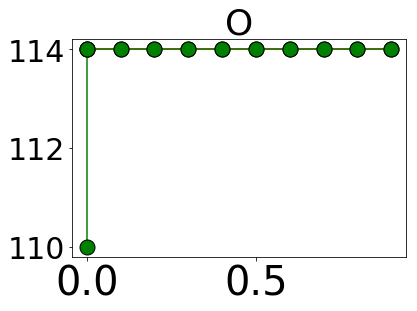

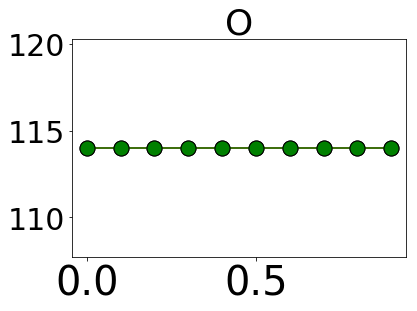

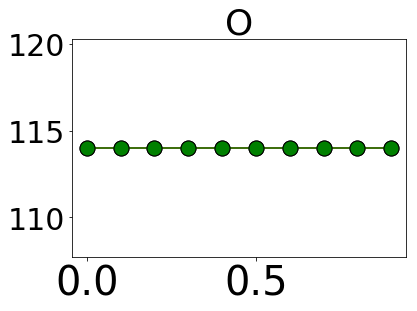

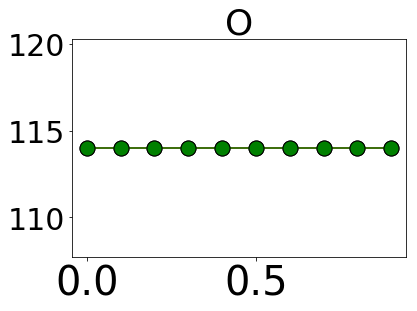

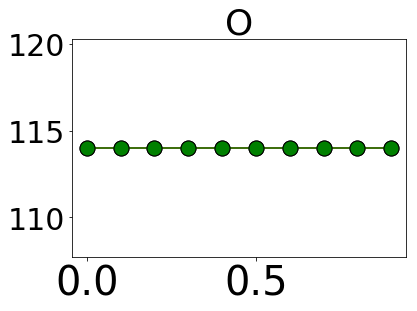

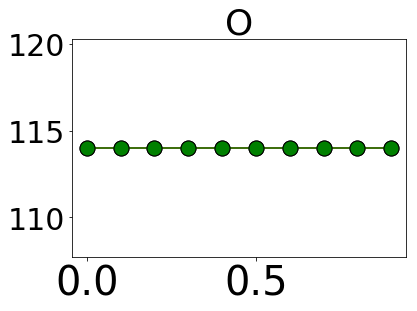

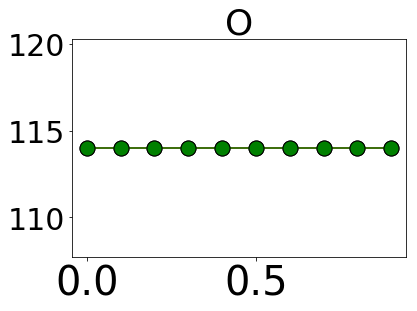

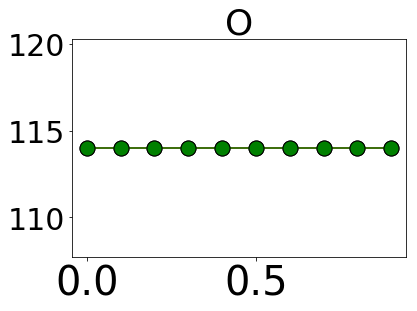

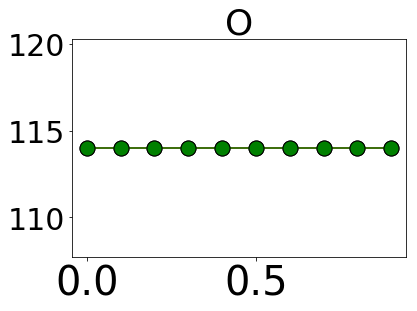

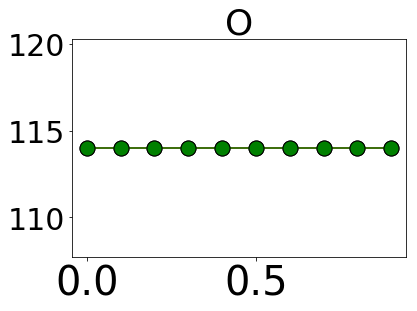

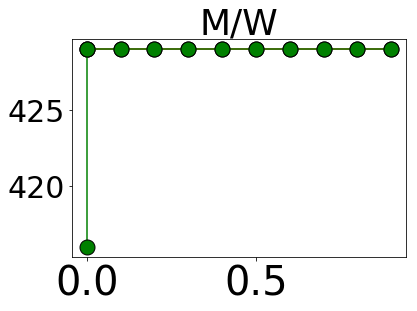

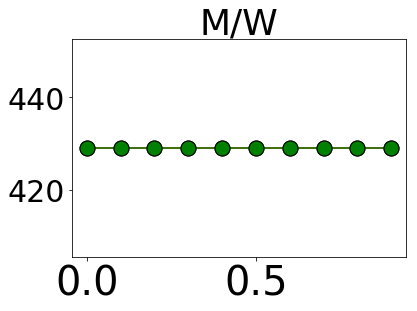

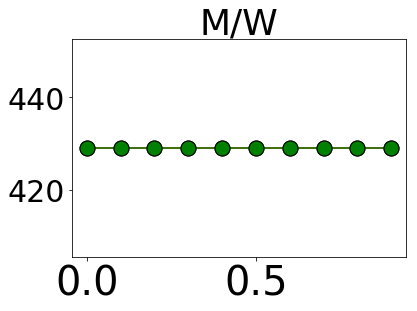

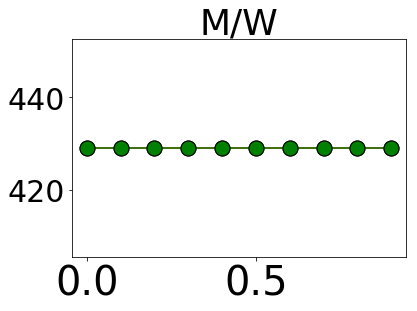

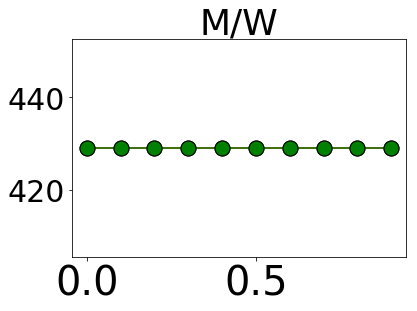

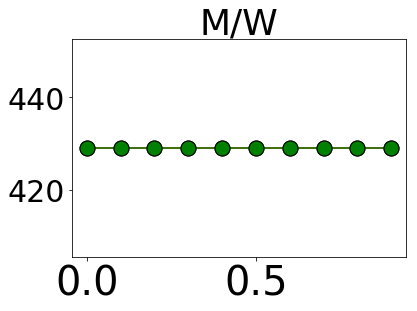

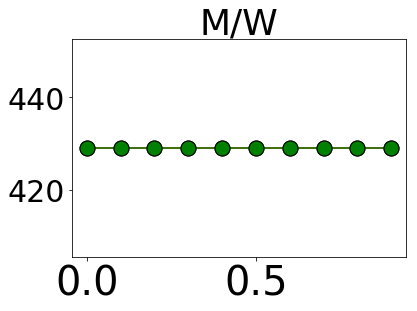

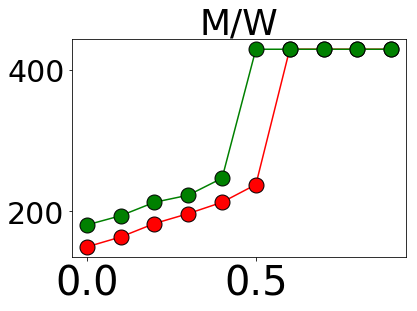

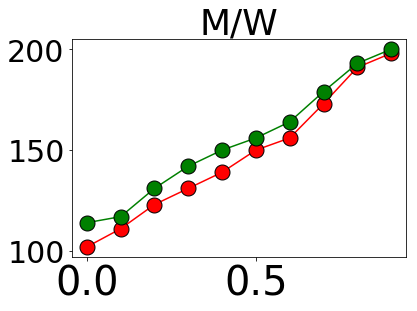

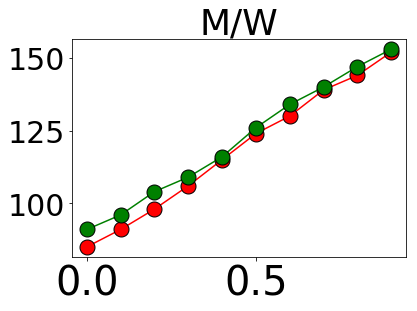

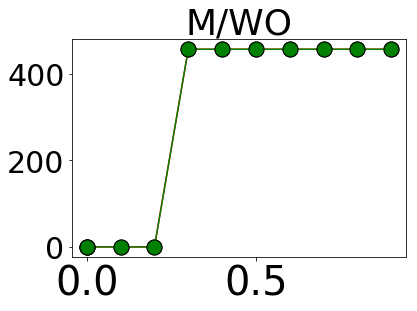

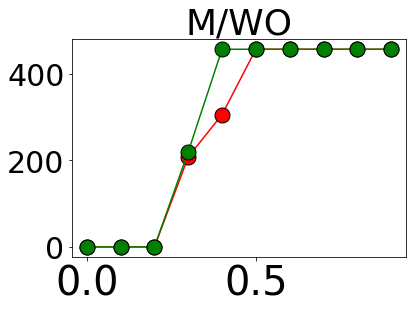

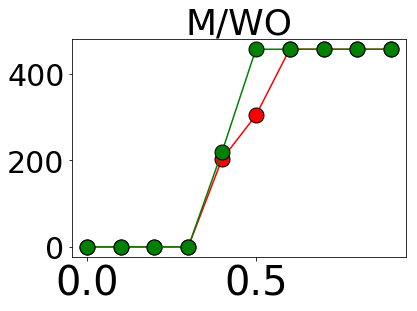

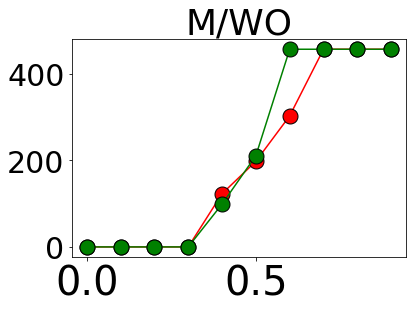

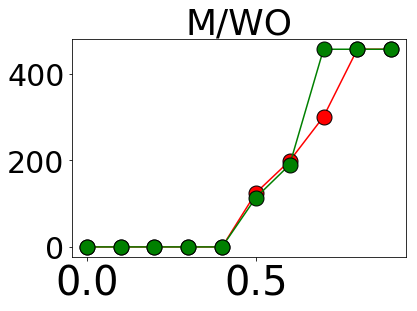

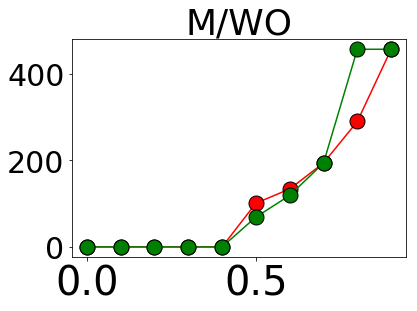

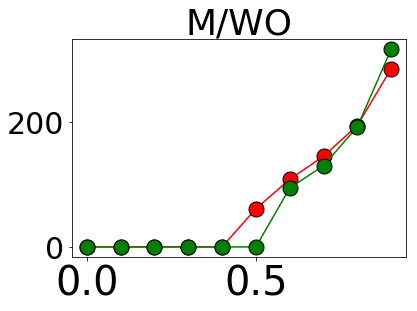

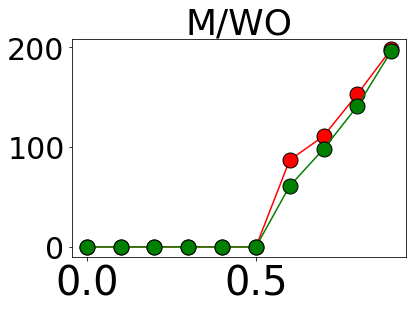

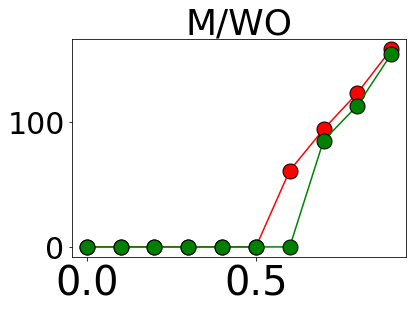

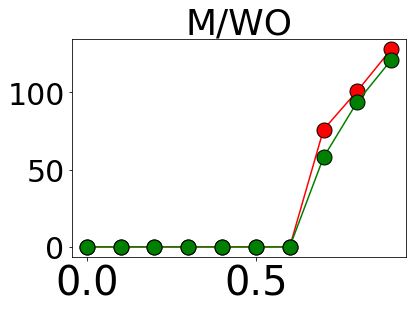

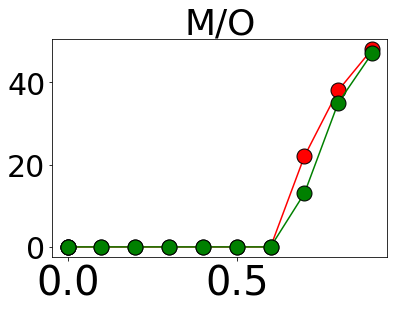

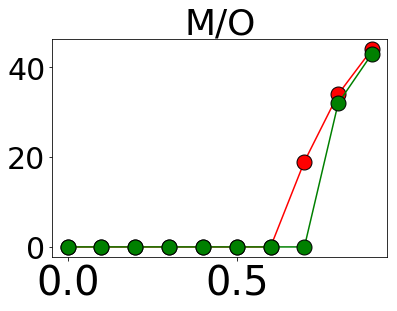

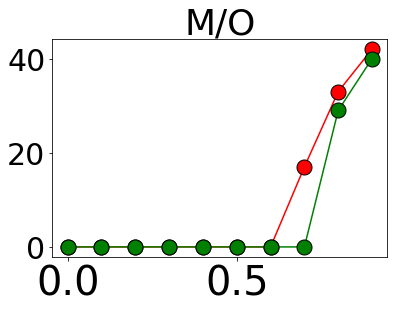

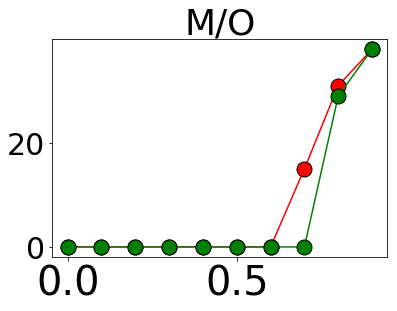

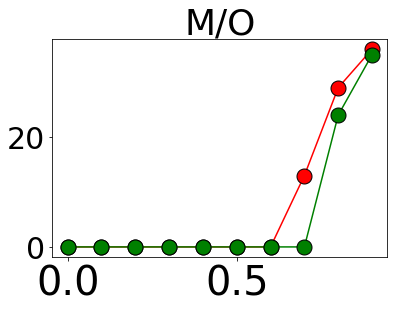

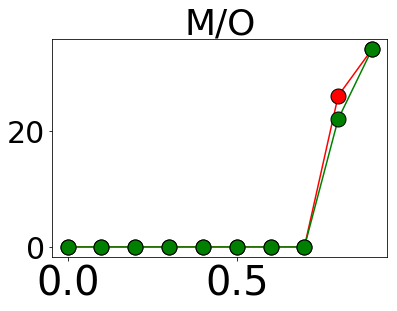

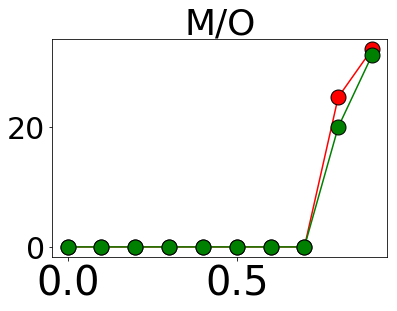

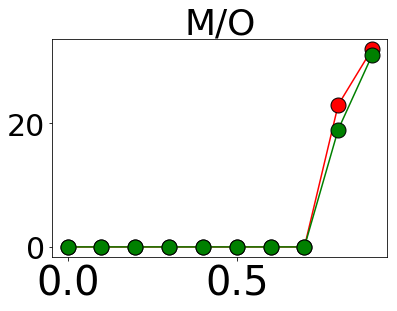

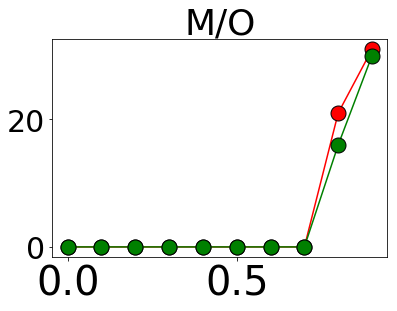

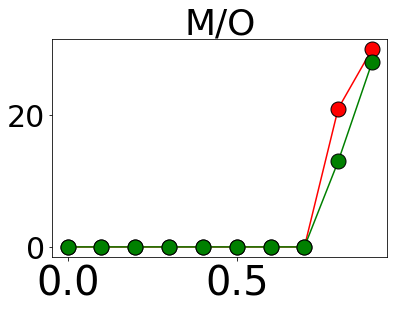

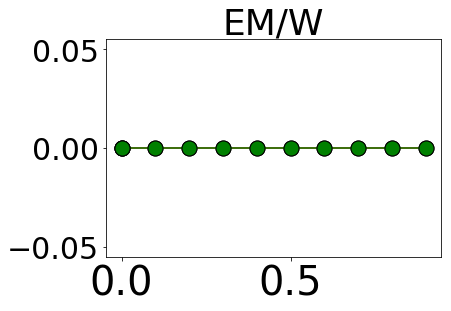

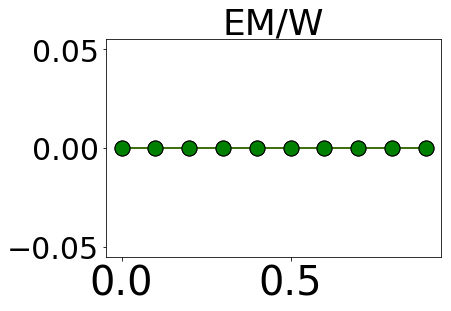

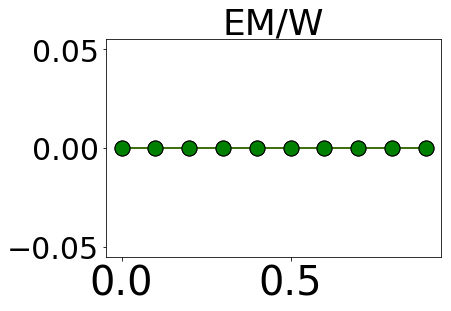

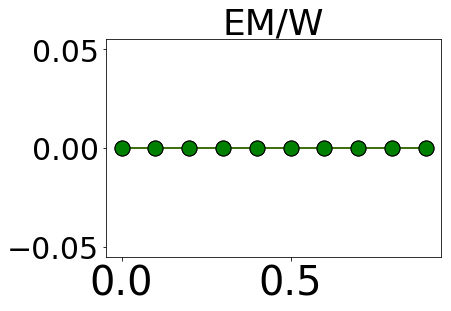

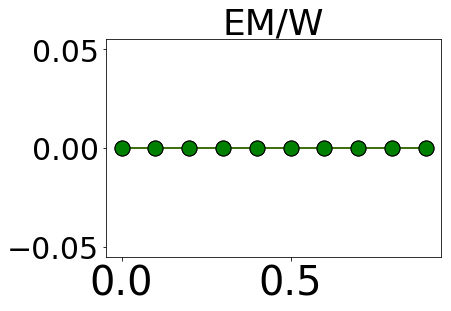

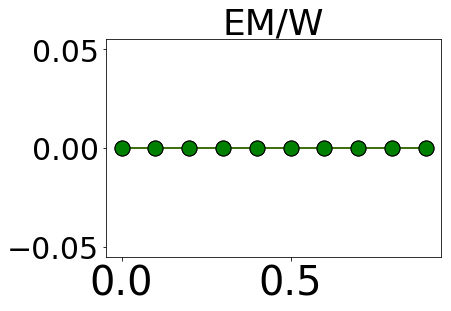

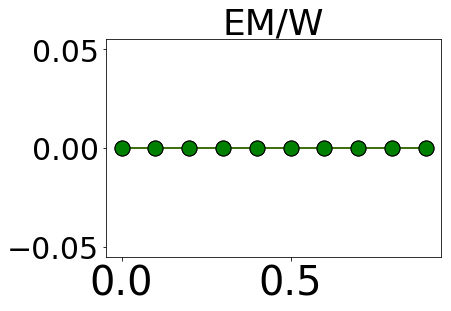

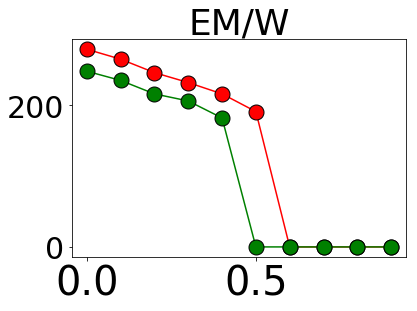

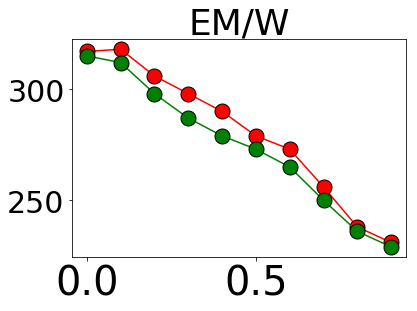

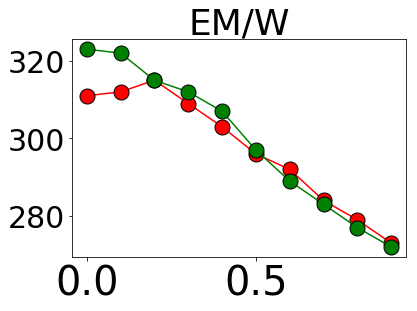

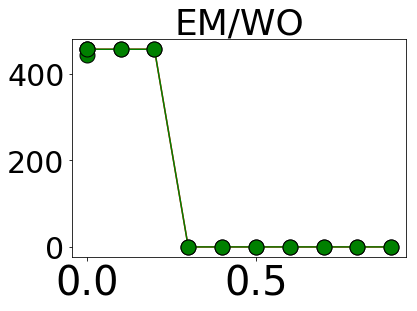

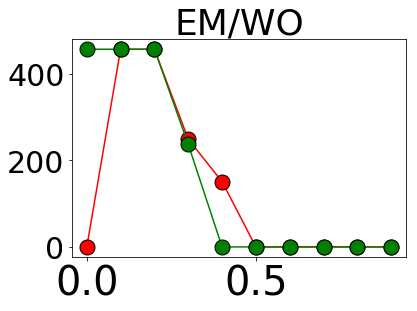

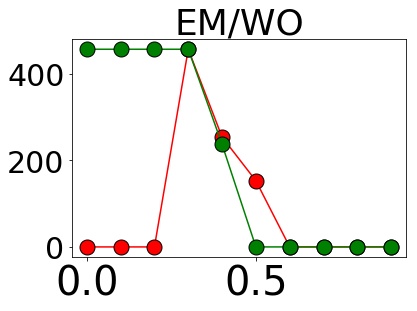

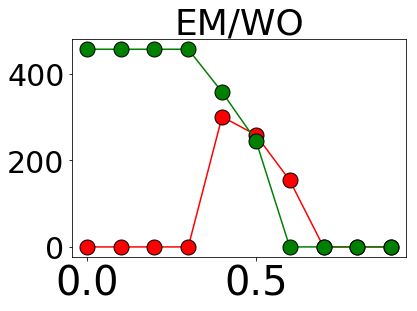

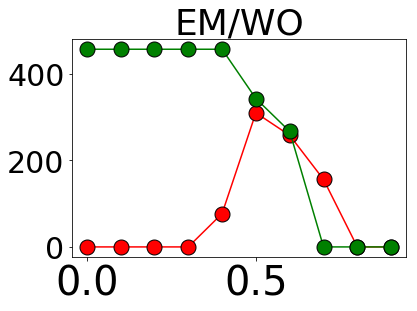

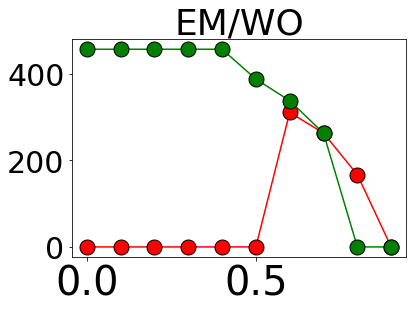

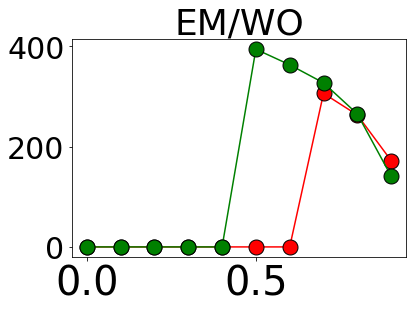

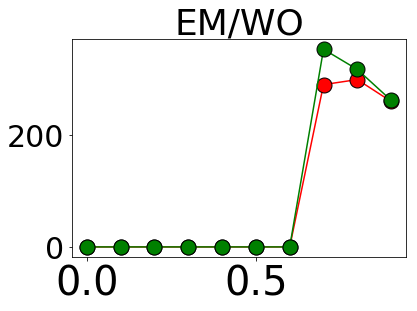

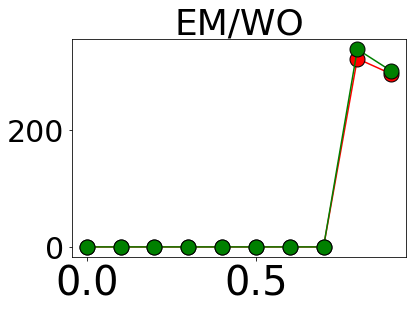

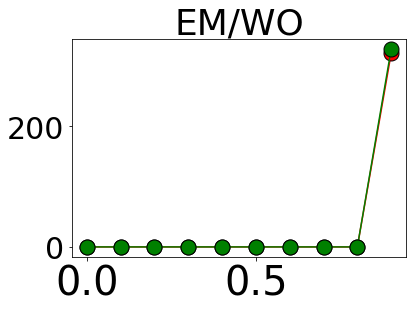

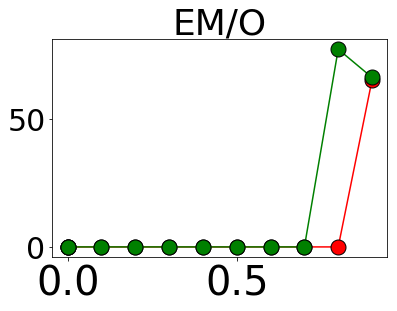

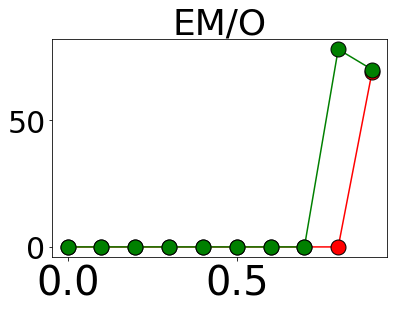

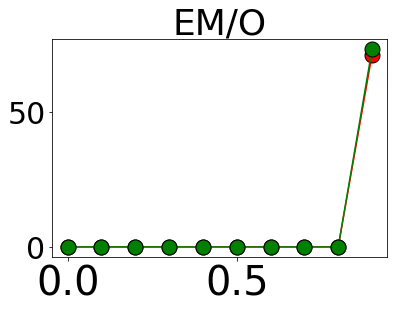

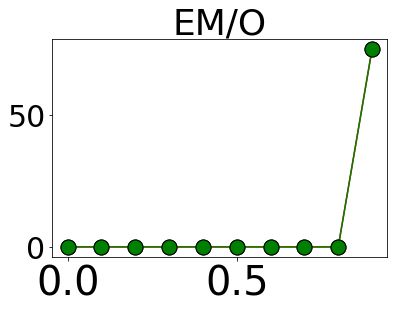

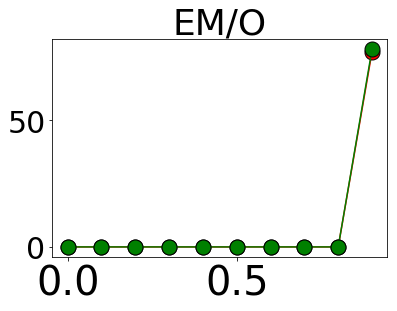

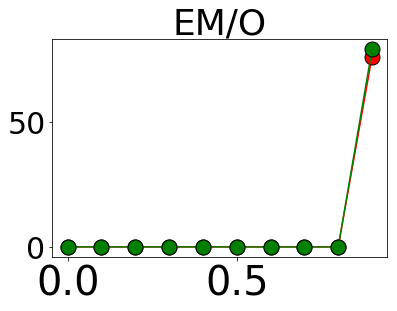

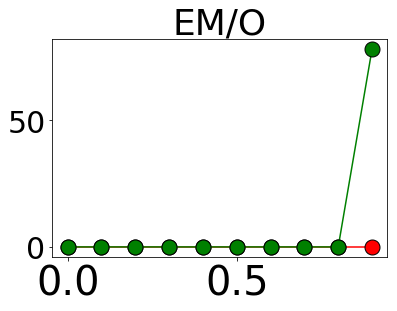

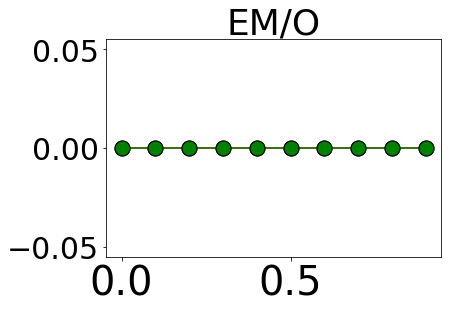

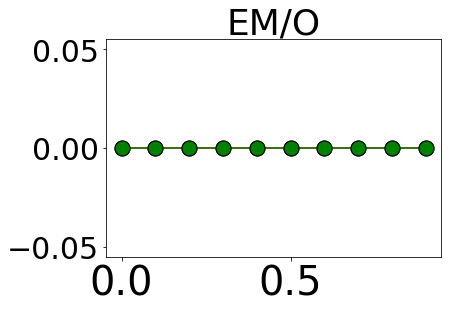

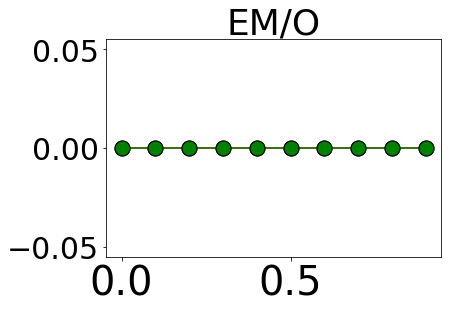

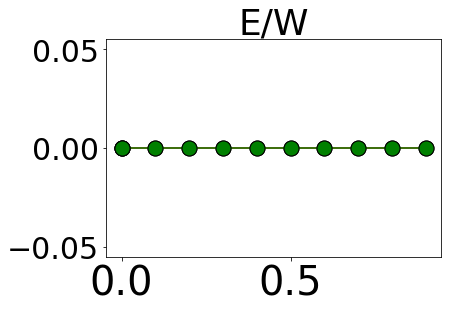

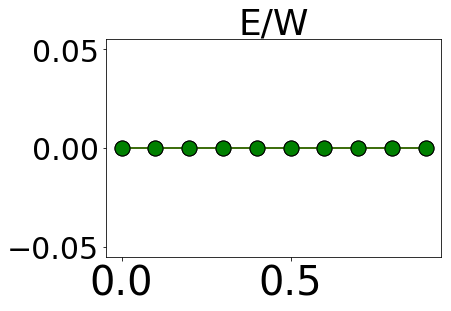

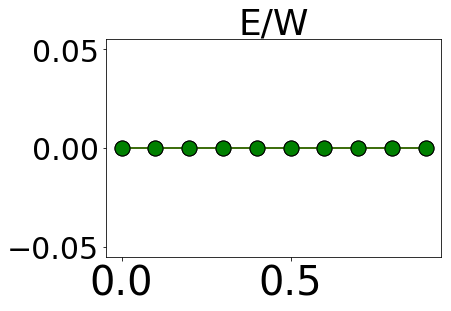

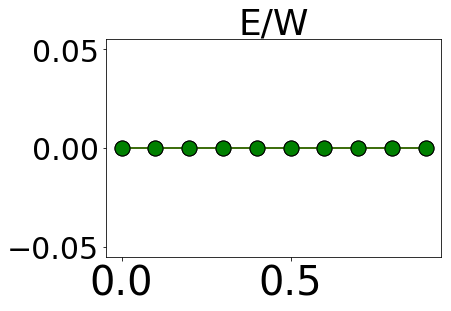

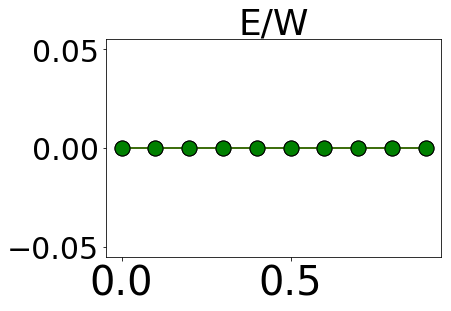

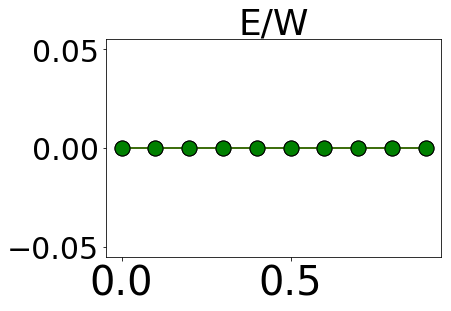

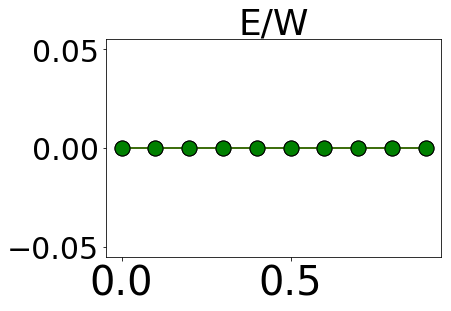

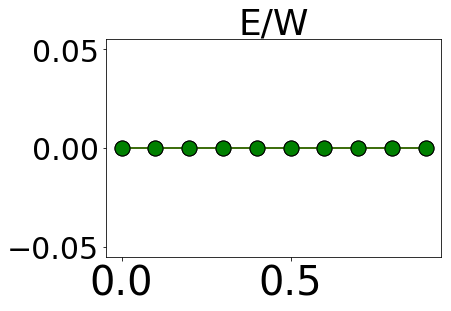

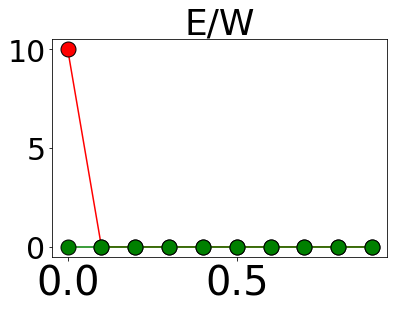

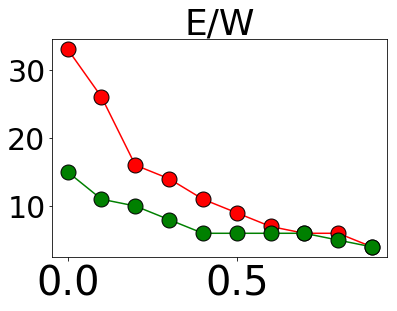

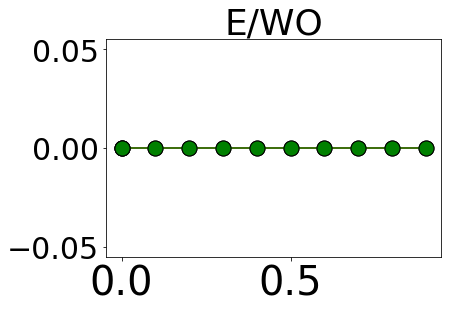

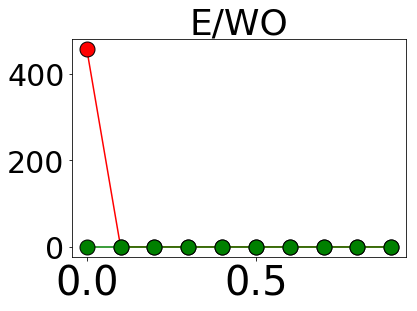

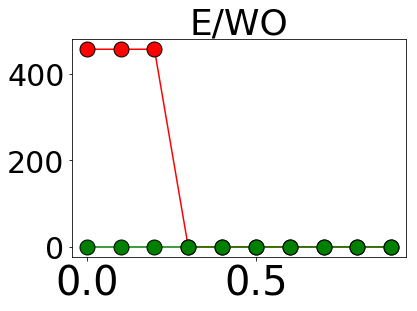

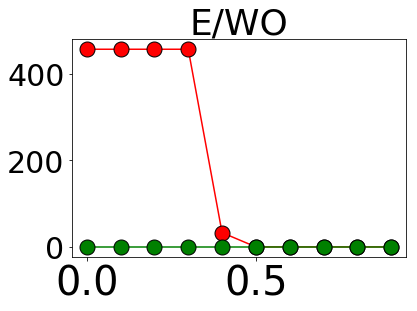

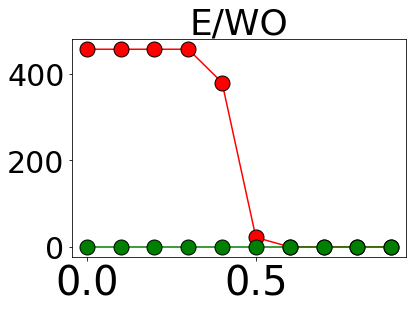

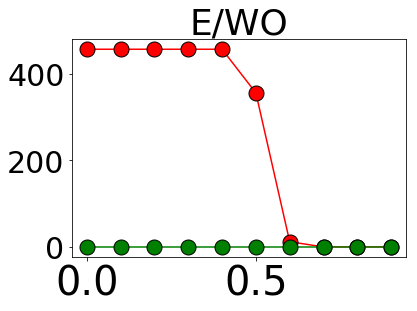

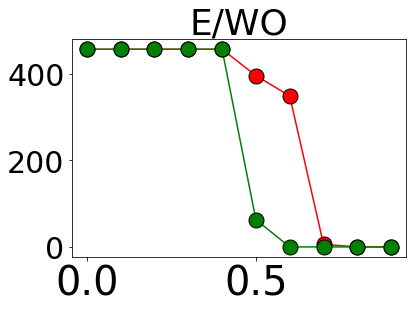

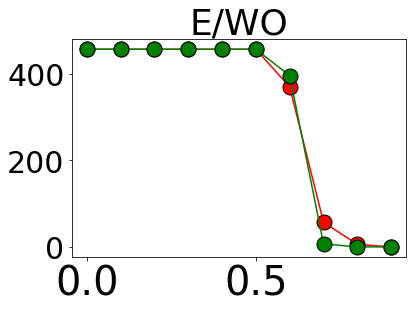

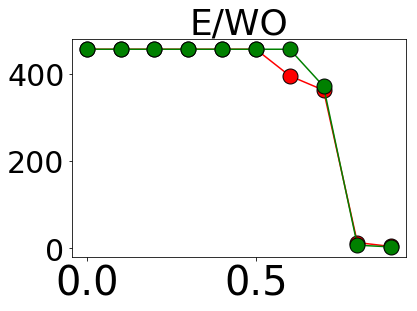

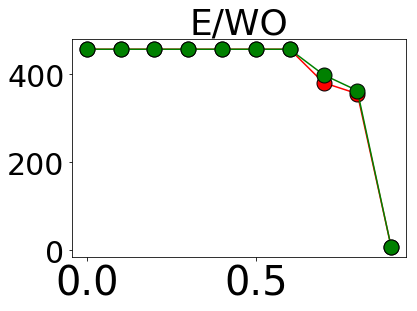

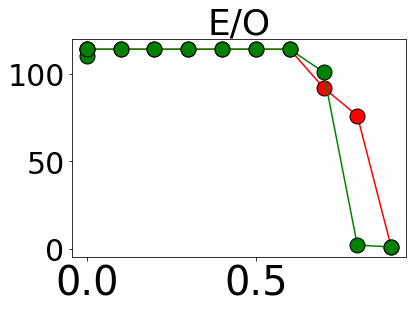

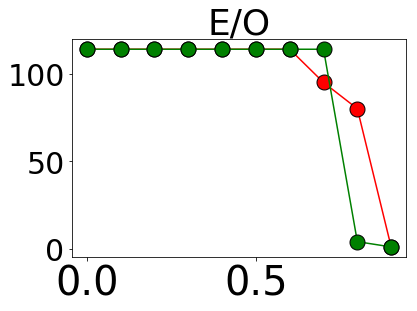

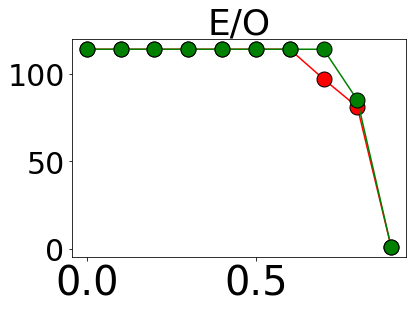

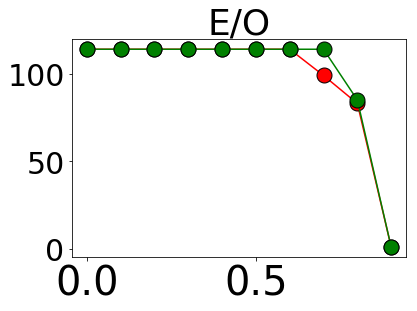

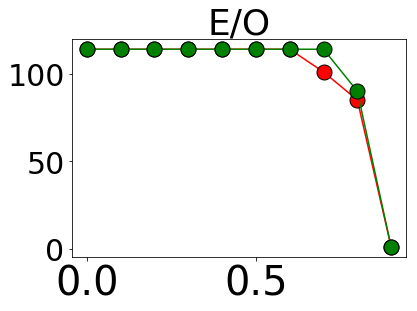

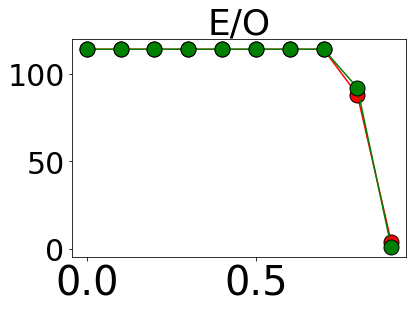

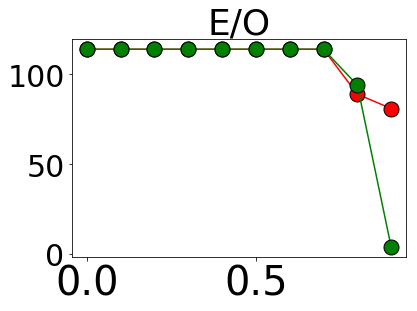

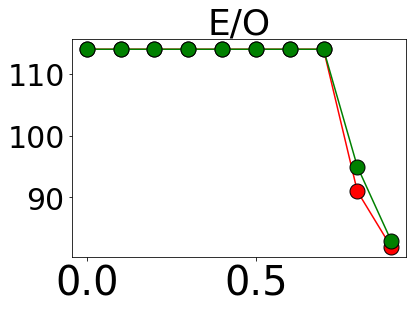

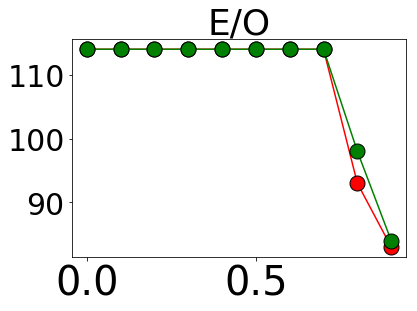

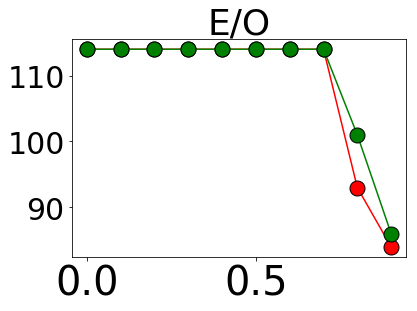

In [22]:
scale_Au =0.2
for key in key_list:
    for el2 in np.unique(df_ASu['HU'].values):
        inds0 = np.argwhere(df_ASu['HU'].values==el2)[:,0]
        inds = np.argsort(df_ASu['AS'].values[inds0])
        x = df_ASu['AS'].values[inds0][inds]
        y = df_ASu[key].values[inds0][inds]
        plt.plot(x,y,'ro-',label='AS',markersize=15,markeredgecolor='k')
        
        inds0 = np.argwhere(df_Auu['HU'].values==el2)[:,0]
        inds2 = np.argsort(df_Auu['AU'].values[inds0])
        x2 = df_Auu['AU'].values[inds0][inds2]
        y2 = df_Auu[key].values[inds0][inds2]
        #plt.plot(1-x2*scale_Au,y2,'k*-',label='Au')
        
        inds0 = np.argwhere(df_AZu['HU'].values==el2)[:,0]
        inds3 = np.argsort(df_AZu['AZ'].values[inds0])
        x3 = df_AZu['AZ'].values[inds0][inds3]
        y3 = df_AZu[key].values[inds0][inds3]
        plt.plot(x3,y3,'go-',label='AZ',markersize=15,markeredgecolor='k')

        plt.title(key)
        plt.show()

In [23]:
bx1,by1,bc1,colors_list1 = getIndBound(df_ASu,'AS','HU')
bx2,by2,bc2,colors_list2 = getIndBound(df_Auu,'AU','HU')
bx3,by3,bc3,colors_list3 = getIndBound(df_AZu,'AZ','HU')

all_types=[]
for i in range(len(colors_list1)):
    all_types+=[colors_list1[i][0]]
for i in range(len(colors_list2)):
    all_types+=[colors_list2[i][0]]
for i in range(len(colors_list3)):
    all_types+=[colors_list3[i][0]]
    
all_types=np.unique(all_types)
legend = getLegend(all_types)

loc1 = getLoc(bc1,colors_list1)
loc2 = getLoc(bc2,colors_list2)
loc3 = getLoc(bc3,colors_list3)

IndexError: list index out of range

In [ ]:
## low equivalents
figure = plt.figure(figsize=(10,10))
lw = 40
for i in range(len(bx1)):
    plt.fill_between(bx1[i],0,1,facecolor=__clist[loc1[i]])
for i in range(len(bx3)):
    plt.fill_between(bx3[i],1,1.8,facecolor=__clist[loc3[i]])
    

for i in range(len(bx2)):
    plt.fill_between(np.array(bx2[i]),2,3,facecolor=__clist[loc2[i]])
        
plt.legend(handles=legend,  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,4)

## Look at double links now (HS)

In [25]:
dirN='../coupledWReg_Ccode/crosstalk_AS_HS/'
fsave='data/crosstalk_AS_HS.txt'
output_results(dirN,fsave)

dirN='../coupledWReg_Ccode/crosstalk_Au_HS/'
fsave='data/crosstalk_Au_HS.txt'
output_results(dirN,fsave)

dirN='../coupledWReg_Ccode/crosstalk_AZ_HS/'
fsave='data/crosstalk_AZ_HS.txt'
output_results(dirN,fsave)


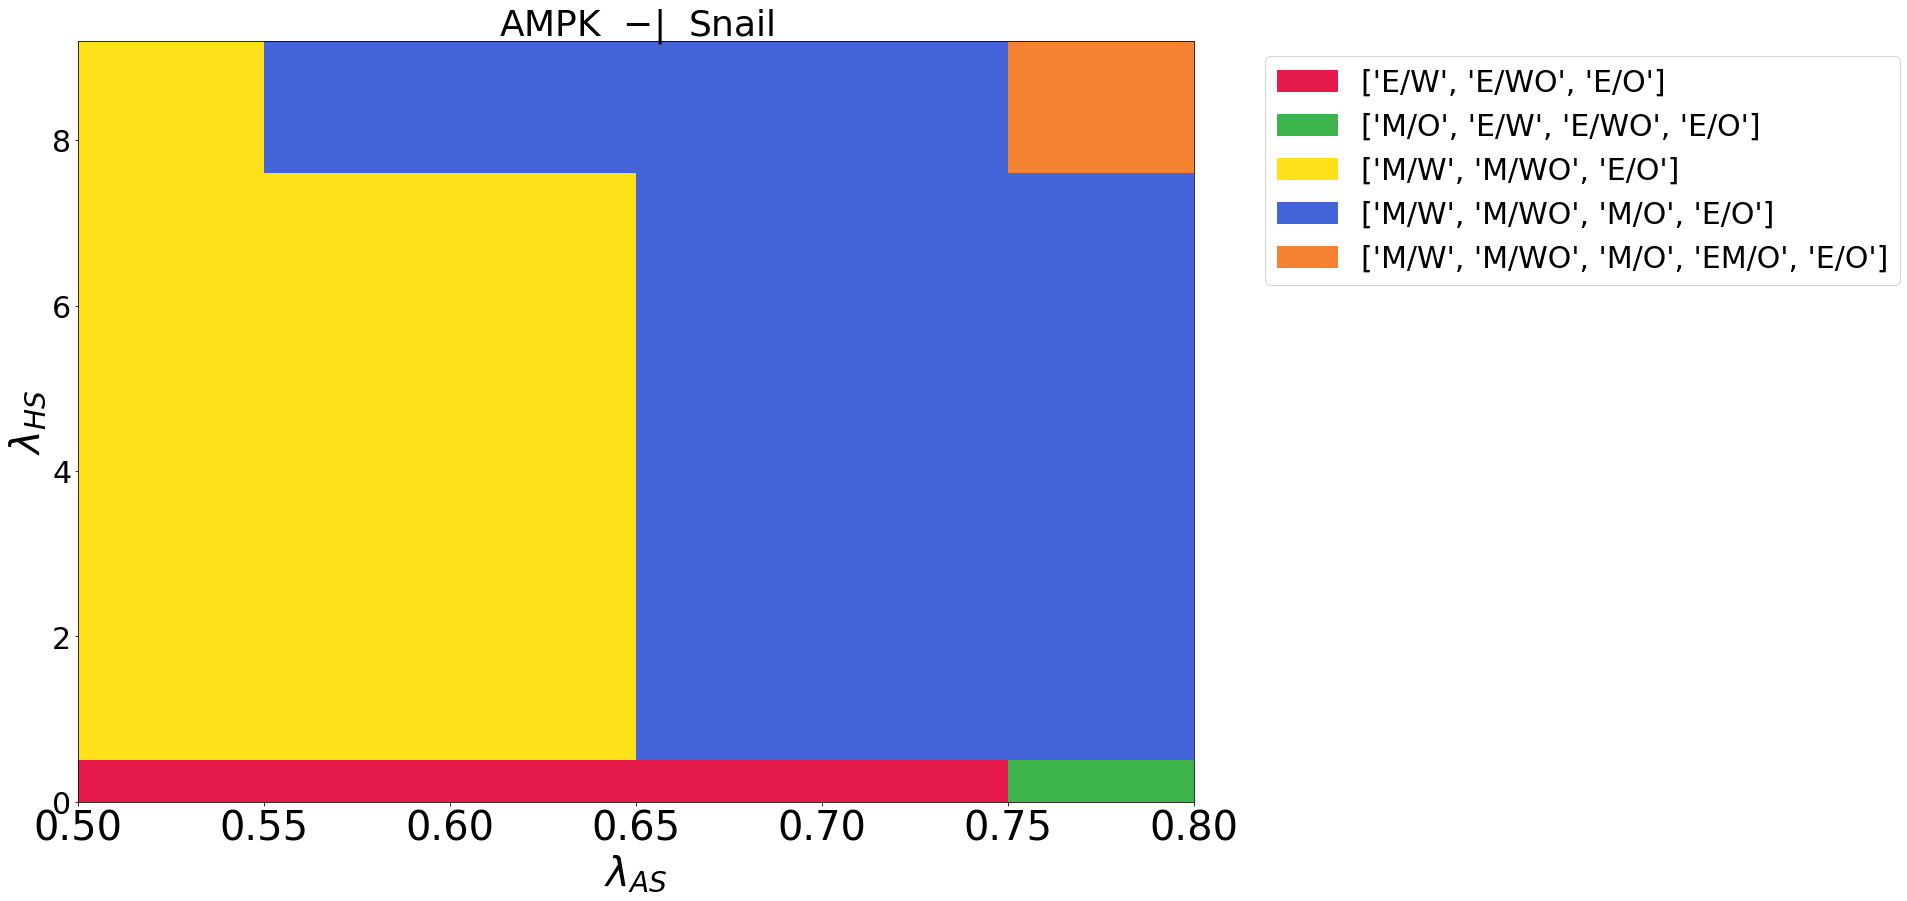

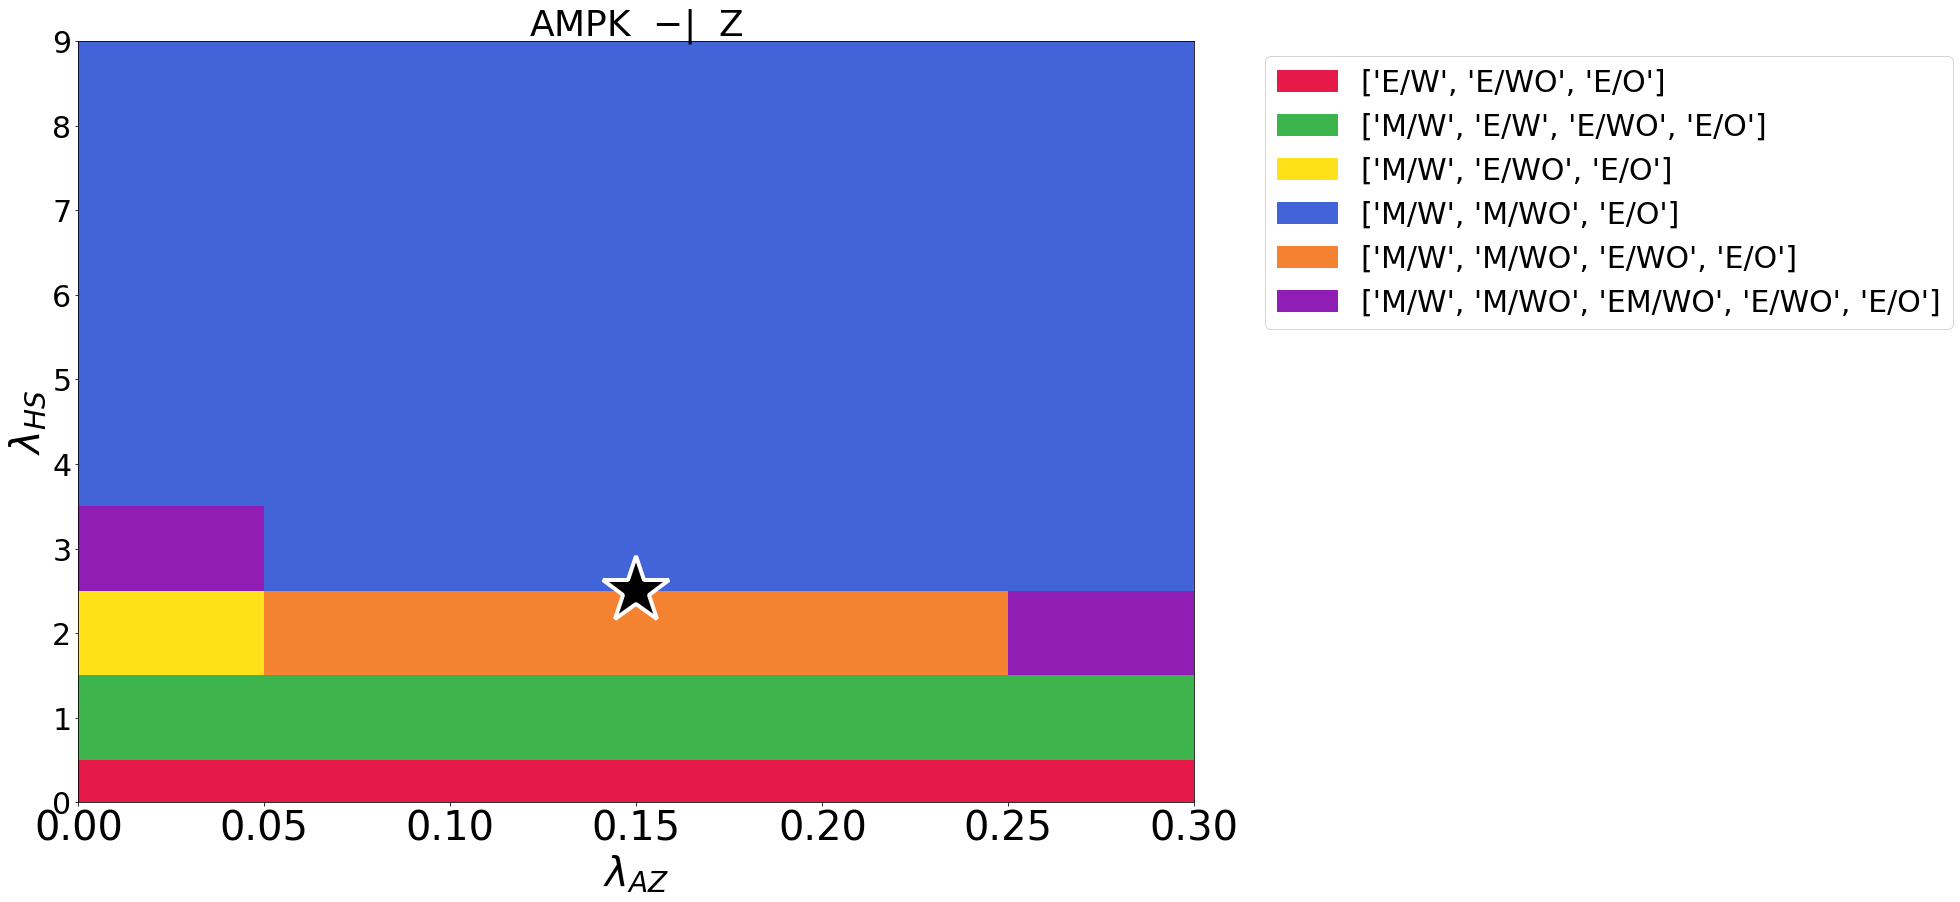

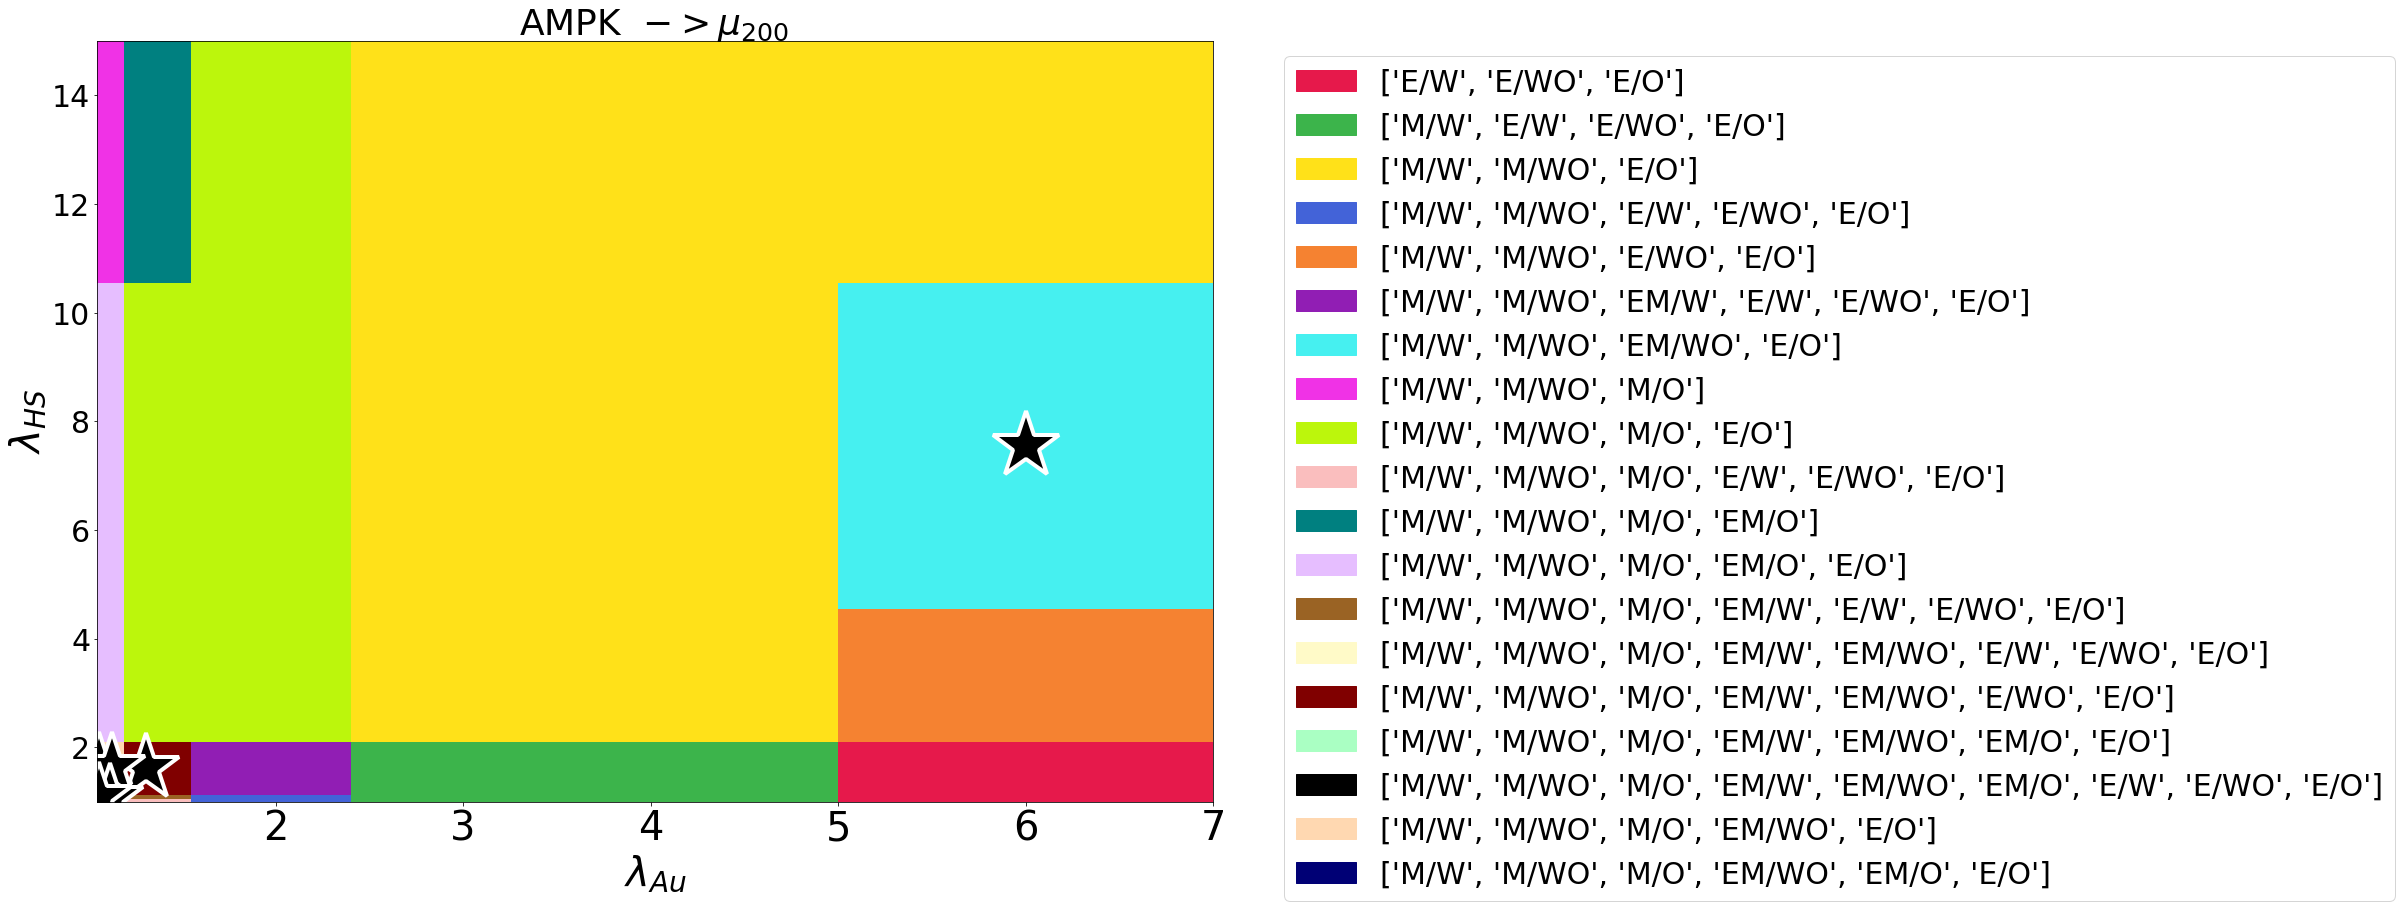

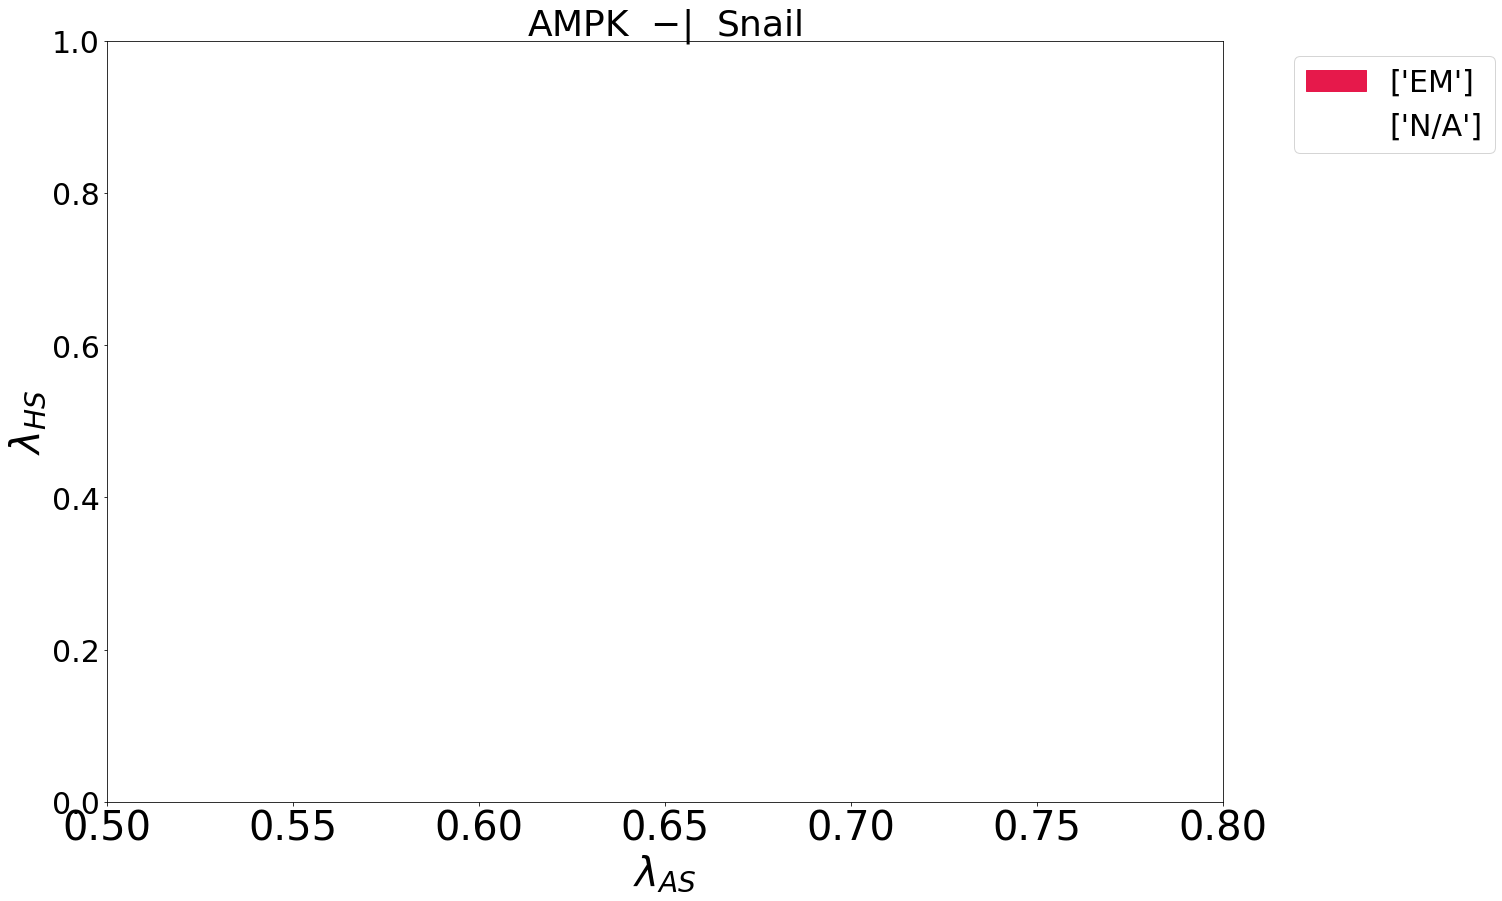

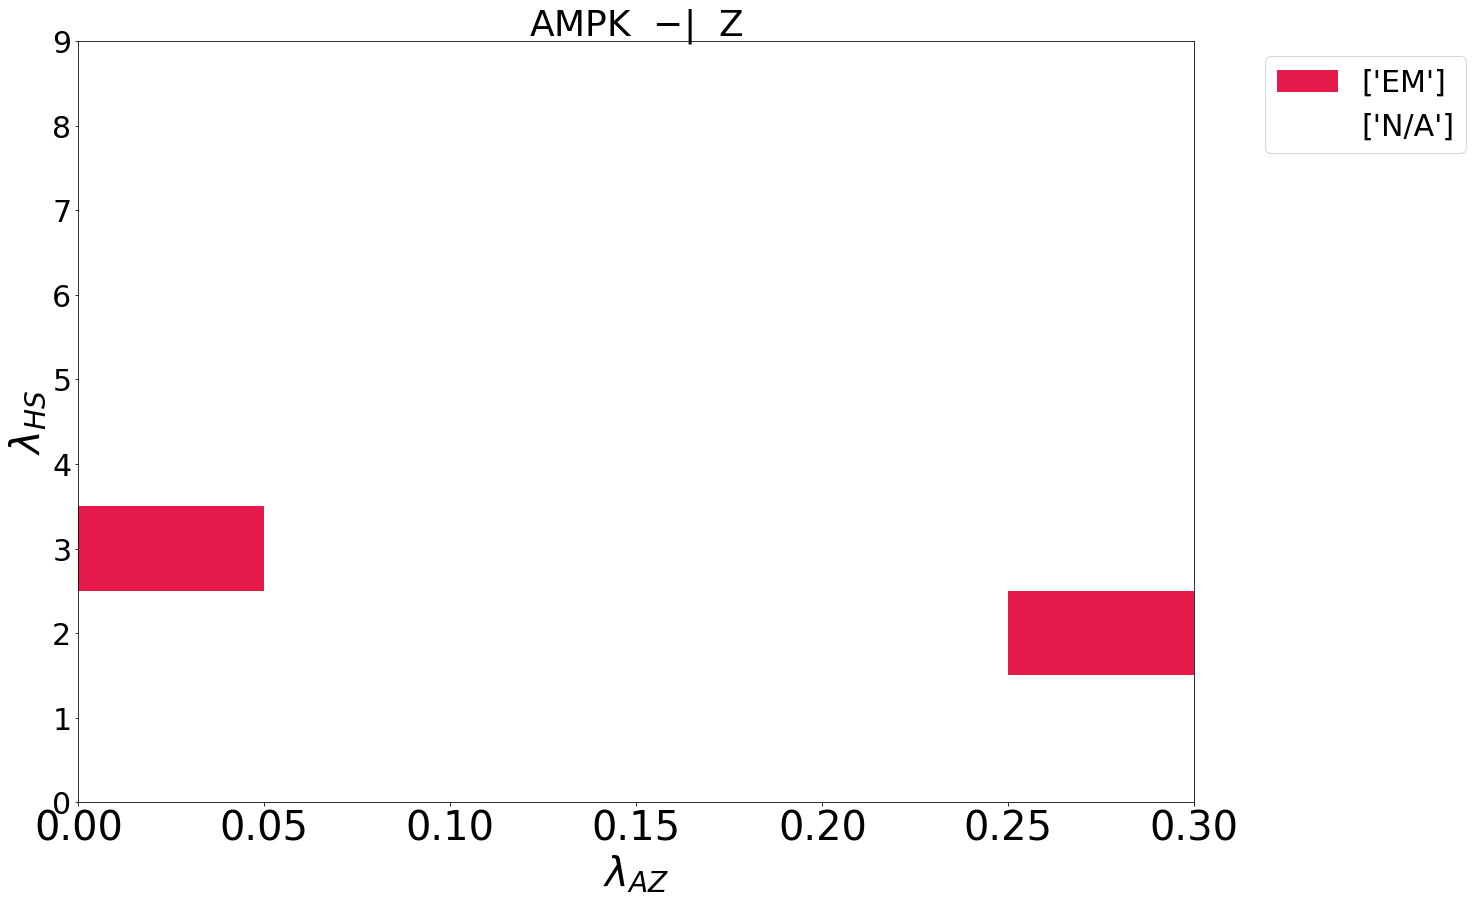

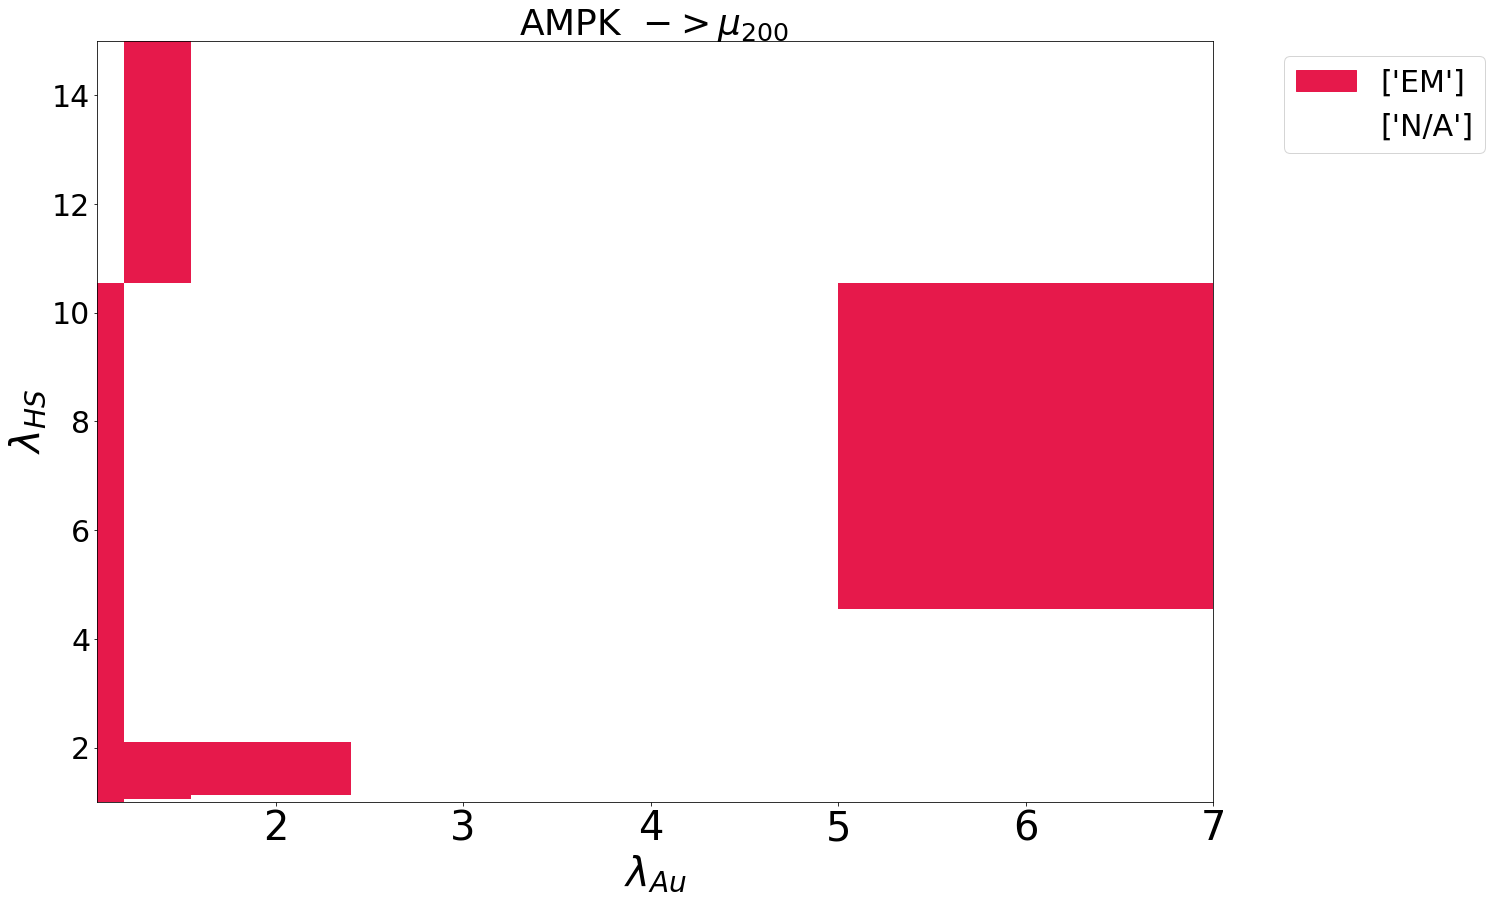

In [26]:
dirN='data/crosstalk_AS_HS.txt'
xa = 'AS'
ya = 'HS'
title='AMPK  $-|$  Snail'
fsave='figures/crosstalk_AS_HS'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave)

dirN='data/crosstalk_AZ_HS.txt'
xa = 'AZ'
title='AMPK  $-|$  Z'
fsave='figures/crosstalk_AZ_HS'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave)

dirN='data/crosstalk_Au_HS.txt'
xa = 'Au'
title='AMPK  $-> \mu_{200}$ '
fsave='figures/crosstalk_Au_HS'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave)




dirN='data/crosstalk_AS_HS.txt'
xa = 'AS'
title='AMPK  $-|$  Snail'
fsave='figures/crosstalk_AS_HS'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave,onlyShowHybrid='EM',ylim=[0,1])

dirN='data/crosstalk_AZ_HS.txt'
xa = 'AZ'
title='AMPK  $-|$  Z'
fsave='figures/crosstalk_AZ_HS'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave,onlyShowHybrid='EM')


dirN='data/crosstalk_Au_HS.txt'
xa = 'Au'
title='AMPK  $-> \mu_{200}$ '
fsave='figures/crosstalk_Au_HS'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave,onlyShowHybrid='EM')


739 != 1000.0


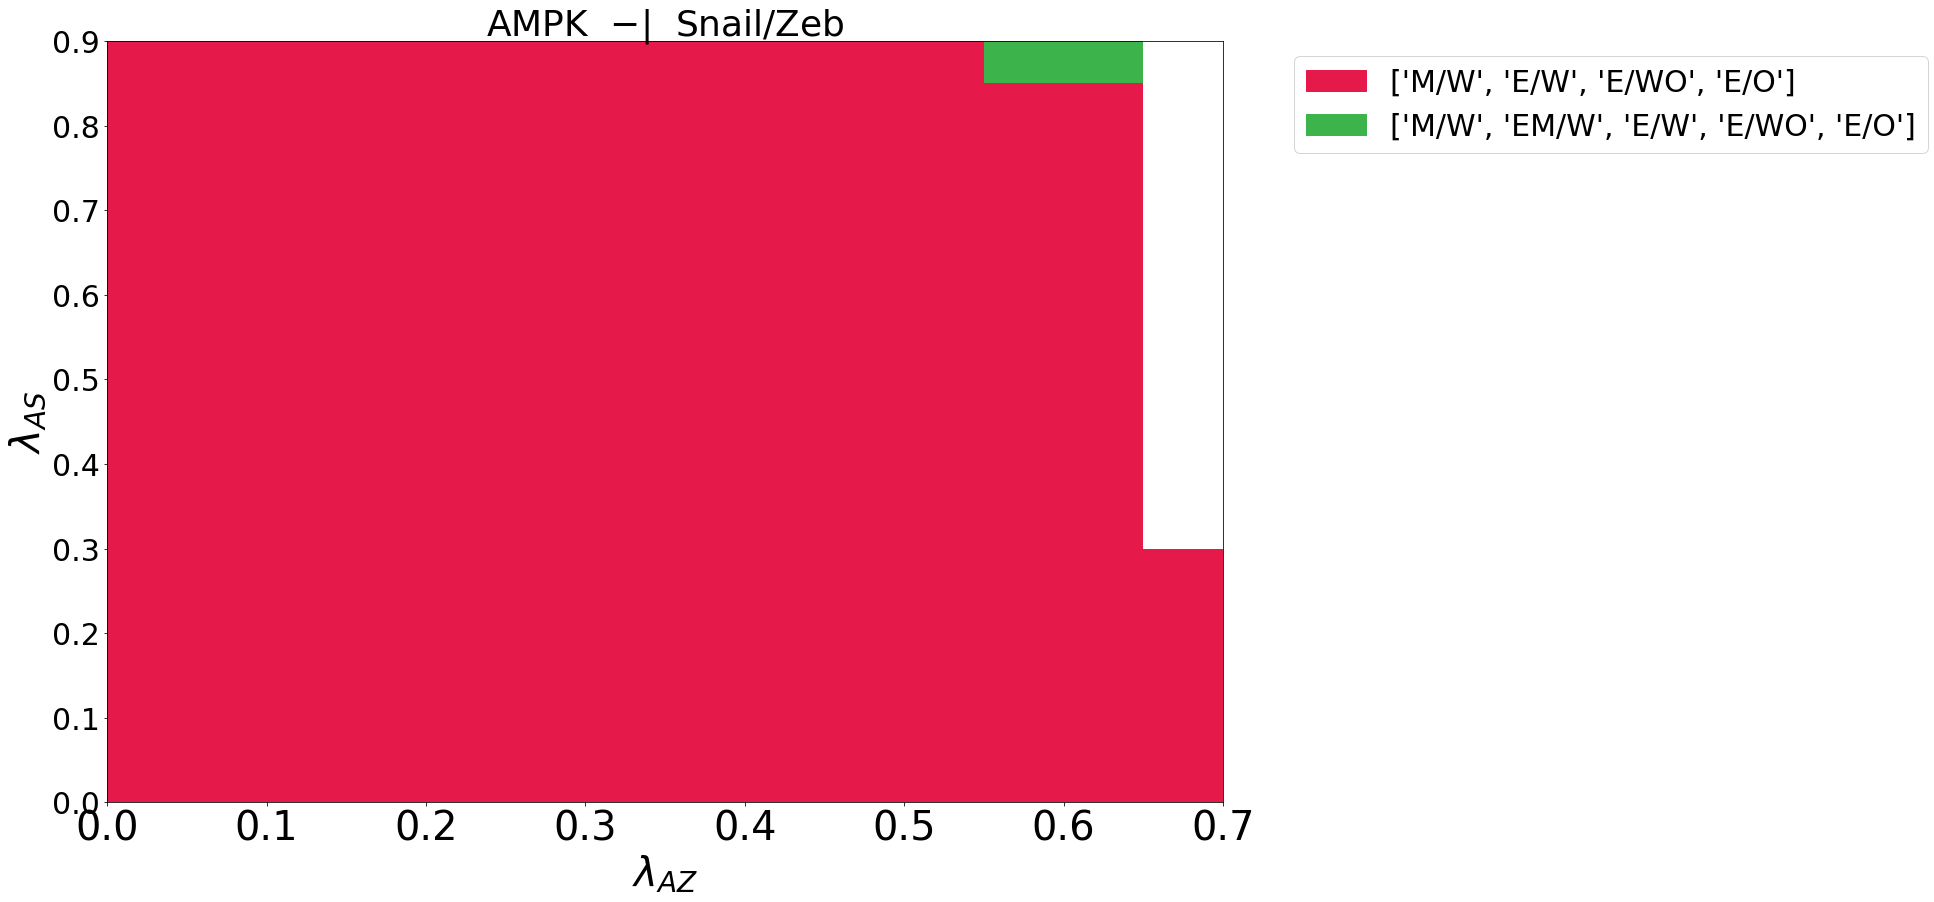

In [28]:

dirN='../coupledWReg_Ccode/crosstalk_AZ_AS/'
fsave='data/crosstalk_AZ_AS.txt'
output_results(dirN,fsave)


dirN='data/crosstalk_AZ_AS.txt'
xa = 'AZ'
ya = 'AS'
title='AMPK  $-|$  Snail/Zeb'
fsave='figures/crosstalk_AZ_AS'
plotCoupledPhenotypes_doubleLink(dirN,xa,ya,title,fsave)


In [12]:
# Compare AS_AZ to AS+AZ

In [58]:
df_AS = pd.read_csv("data/crosstalk_AS.txt")
df_Au = pd.read_csv("data/crosstalk_Au.txt")
df_AZ = pd.read_csv("data/crosstalk_AZ.txt")

In [59]:
df_AS_AZ = pd.read_csv("data/crosstalk_AZ_AS.txt")

In [60]:
key_list =['E', 'EM', 'M', 'W', 'WO', 'O', 'M/W', 'M/WO', 'M/O','EM/W', 'EM/WO', 'EM/O', 'E/W', 'E/WO', 'E/O']

In [61]:
x1 = np.unique(df_AS_AZ['AS'])
x2 = np.unique(df_AS_AZ['AZ'])

In [68]:
for i in x1:
    for j in x2:
        ind1=np.argwhere(df_AS['AS']==i)[:,0][0]
        ind2=np.argwhere(df_AZ['AZ']==j)[:,0] [0]
        
        ind3 = np.argwhere(df_AS_AZ['AS']==i)[:,0]
        ind4 = np.argwhere(df_AS_AZ['AZ']==j)[:,0]
        inds = np.intersect1d(ind3,ind4)[0]

        key = 'EM'
        print i,j,df_AS_AZ[key][inds],df_AS[key][ind1],df_AZ[key][ind2]

0.0 0.0 0 0 0
0.0 0.1 0 0 0
0.0 0.2 0 0 0
0.0 0.3 0 0 0
0.0 0.4 0 0 294
0.0 0.5 0 0 293
0.0 0.6 0 0 291
0.0 0.7 0 0 286
0.0 0.71 0 0 286
0.0 0.72 0 0 283
0.0 0.73 0 0 282
0.0 0.74 0 0 282
0.0 0.75 0 0 282
0.0 0.76 0 0 281
0.0 0.77 0 0 279
0.0 0.78 0 0 279
0.0 0.79 0 0 279
0.0 0.8 0 0 277
0.0 0.9 0 0 272
0.0 0.91 0 0 272
0.0 0.92 0 0 271
0.0 0.93 0 0 270
0.0 0.94 0 0 269
0.0 0.95 0 0 588
0.0 0.96 0 0 690
0.0 0.97 0 0 689
0.0 0.98 0 0 689
0.0 0.99 0 0 690
0.1 0.0 0 0 0
0.1 0.1 0 0 0
0.1 0.2 0 0 0
0.1 0.3 0 0 0
0.1 0.4 0 0 294
0.1 0.5 0 0 293
0.1 0.6 0 0 291
0.1 0.7 0 0 286
0.1 0.71 0 0 286
0.1 0.72 0 0 283
0.1 0.73 0 0 282
0.1 0.74 0 0 282
0.1 0.75 0 0 282
0.1 0.76 0 0 281
0.1 0.77 0 0 279
0.1 0.78 0 0 279
0.1 0.79 0 0 279
0.1 0.8 0 0 277
0.1 0.9 0 0 272
0.1 0.91 0 0 272
0.1 0.92 0 0 271
0.1 0.93 0 0 270
0.1 0.94 0 0 269
0.1 0.95 0 0 588
0.1 0.96 0 0 690
0.1 0.97 0 0 689
0.1 0.98 0 0 689
0.1 0.99 0 0 690
0.2 0.0 0 0 0
0.2 0.1 0 0 0
0.2 0.2 0 0 0
0.2 0.3 0 0 0
0.2 0.4 0 0 294
0.2 0.5 0 0 

0.99 0.76 286 689 281
0.99 0.77 287 689 279
0.99 0.78 283 689 279
0.99 0.79 288 689 279
0.99 0.8 286 689 277
0.99 0.9 284 689 272
0.99 0.91 279 689 272
0.99 0.92 278 689 271
0.99 0.93 271 689 270
0.99 0.94 269 689 269
0.99 0.95 267 689 588
0.99 0.96 591 689 690
0.99 0.97 685 689 689
0.99 0.98 683 689 689
0.99 0.99 686 689 690


In [57]:
df_AS

Empty DataFrame
Columns: [AS, AZ, AU, HS, HU, INPUT, U3M, U3N, UH, E, EM, M, W, WO, O, M/W, M/WO, M/O, EM/W, EM/WO, EM/O, E/W, E/WO, E/O, nics]
Index: []

[0 rows x 25 columns]